<a href="https://colab.research.google.com/github/fathanzhafiri/hactiv8japiri/blob/main/Capstone_Project_Hactiv8_x_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Twitter Auth Token

In [ ]:
#@title Twitter Auth Token

twitter_auth_token = '' # change this auth token

#Install & import lib

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

#Install untuk cleaning data
!pip install Sastrawi
!wget https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt -O slang_words.txt

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,340 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,561 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd

In [ ]:
import shutil
from google.colab import files
import pandas as pd
import glob
import os
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Start Crawling: 27 April - 27 Mei 2025

In [ ]:
#Crawling untuk key: "**nakal barak**"
filename = 'nakalbarak1.csv'
search_keyword = 'nakal barak since:2025-04-27 until:2025-05-27 lang:id'
limit = 600

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏npm warn deprecated rimraf@3.0.2: Rimraf versions prior to v4 are no longer supported
⠏npm warn deprecated inflight@1.0.6: This module is not supported, and leaks memory. Do not use it. Check out lru-cache if you want a good and tested way to coalesce async requests by a key value, which is much more comprehensive and powerful.
⠋npm warn deprecated glob@7.2.3: Glob versions prior to v9 are no longer supported
⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from

In [ ]:
#Crawling untuk key: "**bermasalah barak**"
filename = 'bermasalahbarak1.csv'
search_keyword = 'bermasalah barak since:2025-04-27 until:2025-05-27 lang:id'
limit = 600

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

⠙⠹⠸⠼⠴⠦⠧Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


-- Scrolling... (1) (2)
Filling in keywords: bermasalah barak since:2025-04-27 until:2025-05-27 lang:id

 (3) (4) (5) (6) (7) (8) (9)

Your tweets saved to: /content/tweets-data/bermasalahbarak1.csv
Total tweets saved: 17

-- Scrolling... (1) (2) (3)

Your tweets saved to: /content/tweets-data/bermasalahbarak1.csv
Total tweets saved: 37

-- Scrolling... (1) (2)

Your tweets saved to: /content/tweets-data/bermasalahbarak1.csv
Total tweets saved: 54

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/bermasalahbarak1.csv
Total tweets saved: 73

-- Scrolling... (1)

Your tweets saved to: /

In [ ]:
###Crawling untuk key: "**siswa barak**"
filename = 'siswabarak1.csv'
search_keyword = 'siswa barak since:2025-04-27 until:2025-04-27 lang:id'
limit = 600

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

⠙⠹⠸⠼⠴Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


-- Scrolling... (1)
Filling in keywords: siswa barak since:2025-04-27 until:2025-04-27 lang:id

 (2) (3) (4) (5) (6) (7) (8) (9)[v2.6.1] Error: page.waitForResponse: Target page, context or browser has been closed
Keywords: siswa barak since:2025-04-27 until:2025-04-27 lang:id
Twitter Harvest v 2.6.1
^C


In [ ]:
###Crawling untuk key: "**pelajar barak**"
filename = 'pelajarbarak1.csv'
search_keyword = 'pelajar barak since:2025-04-27 until:2025-05-27 lang:id'
limit = 600

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

⠙⠹⠸⠼⠴Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


-- Scrolling... (1)
Filling in keywords: pelajar barak since:2025-04-27 until:2025-05-27 lang:id

 (2) (3) (4) (5) (6)Created new directory: /content/tweets-data


Your tweets saved to: /content/tweets-data/pelajarbarak1.csv
Total tweets saved: 18

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/pelajarbarak1.csv
Total tweets saved: 37

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/pelajarbarak1.csv
Total tweets saved: 57

-- Scrolling... (1) (2)

Your tweets saved to: /content/tweets-data/pelajarbarak1.csv
Total tweets saved: 74


Your tweets saved to: /content/tweet

In [ ]:
#Crawling untuk key: "**@DediMulyadi71 barak**"
filename = 'KDMbarak1.csv'
search_keyword = '@DediMulyadi71 barak since:2025-04-27 until:2025-05-27 lang:id'
limit = 600

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

⠙⠹⠸⠼⠴⠦Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


-- Scrolling... (1) (2)
Filling in keywords: @DediMulyadi71 barak since:2025-04-27 until:2025-05-27 lang:id

 (3)

Your tweets saved to: /content/tweets-data/KDMbarak1.csv
Total tweets saved: 20


Your tweets saved to: /content/tweets-data/KDMbarak1.csv
Total tweets saved: 36

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/KDMbarak1.csv
Total tweets saved: 56

-- Scrolling... (1) (2)

Your tweets saved to: /content/tweets-data/KDMbarak1.csv
Total tweets saved: 76

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/KDMbarak1.csv
Total tweets saved: 96

-- Scrolling... (1)

##Merge crawled data

In [ ]:
# Path ke folder tempat semua file CSV berada
folder_path = "tweets-data/"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Inisialisasi list untuk menampung semua DataFrame
all_dfs = []

# Baca semua CSV dan simpan ke list
for file in csv_files:
    df = pd.read_csv(file)
    all_dfs.append(df)

# Gabungkan semua DataFrame jadi satu
combined_df = pd.concat(all_dfs, ignore_index=True)

# Hapus duplikat berdasarkan conversation_id_str
combined_df = combined_df.drop_duplicates(subset="conversation_id_str").reset_index(drop=True)

# Simpan hasil gabungan ke file baru
combined_df.to_csv("tweets-data/all_combined_clean.csv", index=False)

# Info ringkas
print(f"Gabungan selesai. Total file: {len(csv_files)}. Total tweet unik: {len(combined_df)}")

#Remove News Content
(Keep opinions only)

In [ ]:
# Fungsi deteksi berita
def enhanced_is_news(text):
    text = text.lower()
    has_hashtag = "#" in text
    news_markers = [
        "rangkuman berita", "saksikan", "simak selengkapnya", "update terkini",
        "breaking news", "headline", "mengutip", "diumumkan oleh",
        "menurut informasi", "konferensi pers"
    ]
    contains_marker = any(marker in text for marker in news_markers)

    return has_hashtag or contains_marker

# 1. Tandai baris mana yang berita
is_berita = combined_df["full_text"].apply(enhanced_is_news)

# 2. Buat DataFrame berita dan sisanya (opini + link)
df_berita = combined_df[is_berita].reset_index(drop=True)
df_non_berita = combined_df[~is_berita].reset_index(drop=True)

# 3. Dari yang non-berita, pisahkan lagi yang mengandung link
# Deteksi link secara umum (http/https di teks)
contains_link = df_non_berita["full_text"].str.contains(r"http[s]?://", regex=True)

df_link = df_non_berita[contains_link].reset_index(drop=True)     # Tweet opini yang ada link
df_opini = df_non_berita[~contains_link].reset_index(drop=True)   # Tweet opini tanpa link

# 4. (Opsional) Simpan semua ke CSV
df_berita.to_csv("data_berita_saja.csv", index=False)
df_link.to_csv("data_opini_dengan_link.csv", index=False)
df_opini.to_csv("data_opini_tanpa_link.csv", index=False)

# 5. (Opsional) Download di Colab
from google.colab import files
files.download("data_berita_saja.csv")
files.download("data_opini_dengan_link.csv")
files.download("data_opini_tanpa_link.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Upload Data "data_opini_tanpa_link.csv" dan jalankan program di bawah

#Data Cleaning
(Normalization of slang using the Indo Slang Dictionary, followed by tokenization, stopword removal, and stemming)

In [ ]:
#Read data
df_read = pd.read_csv("data_opini_tanpa_link.csv")
df = df_read[['conversation_id_str', 'created_at' , 'favorite_count' ,'full_text']].copy()

In [ ]:
import json
# 2. Load file sebagai JSON
with open("slang_words.txt", "r", encoding="utf-8") as f:
    slang_dict = json.load(f)

# Tes isi
print(list(slang_dict.items())[:5])

[('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know')]


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Inisialisasi tools
stop_words = set(stopwords.words('indonesian'))
stemmer = StemmerFactory().create_stemmer()

# Fungsi cleaning awal
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

#Normalisasi
def normalize_slang(text, slang_dict):
    words = text.split()
    normalized = [slang_dict.get(word, word) for word in words]
    return ' '.join(normalized)

# Tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Hapus stopword
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Stemming
def stemming_text(tokens):
    return [stemmer.stem(word) for word in tokens]

# Gabungkan kembali
def to_sentence(tokens):
    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
display(df)

,conversation_id_str,created_at,favorite_count,full_text
0,1925877712511496271,Fri May 23 11:33:48 +0000 2025,0,Gubernur Jawa Barat Dedi Mulyadi mencetuskan p...
1,1919106970620932466,Fri May 23 07:38:16 +0000 2025,0,@direktoridosen @Earthquakesale @ikhwanuddin t...
2,1925790205987930176,Fri May 23 06:44:44 +0000 2025,0,@TirtoID @grok coba telaah berita di atas apak...
3,1925749659902837172,Fri May 23 05:20:12 +0000 2025,1,@tempodotco Skr ini era ancam mengancam ya? Kl...
4,1925567754217955744,Thu May 22 22:56:46 +0000 2025,838,@suryadelalu Bedanya Mulyadi dan Mulyono. Kont...
...,...,...,...,...
1014,1917877907654950949,Thu May 01 10:51:36 +0000 2025,5,@Astrovien @ARSIPAJA Bakal ada 2 output kalo p...
1015,1916784696517968114,Tue Apr 29 00:42:45 +0000 2025,0,@CNNIndonesia Mulai 2026 pelajar jabar terafil...
1016,1916876085792510398,Mon Apr 28 15:24:07 +0000 2025,2,Budaya kek apa yg akan tercipta lewat memasukk...
1017,1916506357261357210,Mon Apr 28 05:57:19 +0000 2025,0,@txtdrimedia Keluar dri barak bikin ormas bata...


In [ ]:
print(df.columns)

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text'], dtype='object')


In [ ]:
import nltk
nltk.download('punkt_tab')  # yang benar

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Cleaning
df['text_cleaned'] = df['full_text'].astype(str).apply(clean_text)

# Normalisasi slang
df['text_normalized'] = df['text_cleaned'].apply(lambda x: normalize_slang(x, slang_dict))

# Tokenisasi
df['text_tokenized'] = df['text_normalized'].apply(tokenize_text)

# Stopword removal
df['text_nostopword'] = df['text_tokenized'].apply(remove_stopwords)

# Stemming
df['text_stemmed'] = df['text_nostopword'].apply(stemming_text)

# Gabung kembali
df['text_final'] = df['text_stemmed'].apply(to_sentence)


In [ ]:
display(df)

,conversation_id_str,created_at,favorite_count,full_text,text_cleaned,text_normalized,text_tokenized,text_nostopword,text_stemmed,text_final
0,1925877712511496271,Fri May 23 11:33:48 +0000 2025,0,Gubernur Jawa Barat Dedi Mulyadi mencetuskan p...,gubernur jawa barat dedi mulyadi mencetuskan p...,gubernur jawa barat dedi mulyadi mencetuskan p...,"[gubernur, jawa, barat, dedi, mulyadi, mencetu...","[gubernur, jawa, barat, dedi, mulyadi, mencetu...","[gubernur, jawa, barat, dedi, mulyadi, cetus, ...",gubernur jawa barat dedi mulyadi cetus program...
1,1919106970620932466,Fri May 23 07:38:16 +0000 2025,0,@direktoridosen @Earthquakesale @ikhwanuddin t...,terus selama ini yg dihasilkan kurikulum giman...,terus selama ini yang dihasilkan kurikulum bag...,"[terus, selama, ini, yang, dihasilkan, kurikul...","[dihasilkan, kurikulum, buktinya, dikirim, bar...","[hasil, kurikulum, bukti, kirim, barak, milite...",hasil kurikulum bukti kirim barak militer masalah
2,1925790205987930176,Fri May 23 06:44:44 +0000 2025,0,@TirtoID @grok coba telaah berita di atas apak...,coba telaah berita di atas apakah penanganan k...,coba telaah berita di atas apakah penanganan k...,"[coba, telaah, berita, di, atas, apakah, penan...","[coba, telaah, berita, penanganan, kenakalan, ...","[coba, telaah, berita, tangan, nakal, remaja, ...",coba telaah berita tangan nakal remaja orang d...
3,1925749659902837172,Fri May 23 05:20:12 +0000 2025,1,@tempodotco Skr ini era ancam mengancam ya? Kl...,skr ini era ancam mengancam ya kl ga dukung wa...,skr ini era ancam mengancam iya kalau ga dukun...,"[skr, ini, era, ancam, mengancam, iya, kalau, ...","[skr, era, ancam, mengancam, iya, ga, dukung, ...","[skr, era, ancam, ancam, iya, ga, dukung, wapr...",skr era ancam ancam iya ga dukung wapres suruh...
4,1925567754217955744,Thu May 22 22:56:46 +0000 2025,838,@suryadelalu Bedanya Mulyadi dan Mulyono. Kont...,bedanya mulyadi dan mulyono konten andalan mul...,bedanya mulyadi dan mulyono konten andalan mul...,"[bedanya, mulyadi, dan, mulyono, konten, andal...","[bedanya, mulyadi, mulyono, konten, andalan, m...","[beda, mulyadi, mulyono, konten, andal, mulyon...",beda mulyadi mulyono konten andal mulyono esem...
...,...,...,...,...,...,...,...,...,...,...
1014,1917877907654950949,Thu May 01 10:51:36 +0000 2025,5,@Astrovien @ARSIPAJA Bakal ada 2 output kalo p...,bakal ada output kalo pelajar kluar dari barak...,bakal ada output kalau pelajar kluar dari bara...,"[bakal, ada, output, kalau, pelajar, kluar, da...","[output, pelajar, kluar, barak, bagus, behaven...","[output, ajar, kluar, barak, bagus, behavenya,...",output ajar kluar barak bagus behavenya hancur...
1015,1916784696517968114,Tue Apr 29 00:42:45 +0000 2025,0,@CNNIndonesia Mulai 2026 pelajar jabar terafil...,mulai pelajar jabar terafiliasi sebagai siswa ...,mulai pelajar jabar terafiliasi sebagai siswa ...,"[mulai, pelajar, jabar, terafiliasi, sebagai, ...","[pelajar, jabar, terafiliasi, siswa, suka, ter...","[ajar, jabar, afiliasi, siswa, suka, lambat, s...",ajar jabar afiliasi siswa suka lambat sekolah ...
1016,1916876085792510398,Mon Apr 28 15:24:07 +0000 2025,2,Budaya kek apa yg akan tercipta lewat memasukk...,budaya kek apa yg akan tercipta lewat memasukk...,budaya seperti apa yang akan tercipta lewat me...,"[budaya, seperti, apa, yang, akan, tercipta, l...","[budaya, tercipta, memasukkan, pelajar, bermas...","[budaya, cipta, masuk, ajar, masalah, barak, w...",budaya cipta masuk ajar masalah barak wkwk
1017,1916506357261357210,Mon Apr 28 05:57:19 +0000 2025,0,@txtdrimedia Keluar dri barak bikin ormas bata...,keluar dri barak bikin ormas batalyon pelajar ...,keluar dari barak bikin ormas batalyon pelajar...,"[keluar, dari, barak, bikin, ormas, batalyon, ...","[barak, bikin, ormas, batalyon, pelajar, letting]","[barak, bikin, ormas, batalyon, ajar, letting]",barak bikin ormas batalyon ajar letting


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   conversation_id_str  1019 non-null   int64 
 1   created_at           1019 non-null   object
 2   favorite_count       1019 non-null   int64 
 3   full_text            1019 non-null   object
 4   text_cleaned         1019 non-null   object
 5   text_normalized      1019 non-null   object
 6   text_tokenized       1019 non-null   object
 7   text_nostopword      1019 non-null   object
 8   text_stemmed         1019 non-null   object
 9   text_final           1019 non-null   object
dtypes: int64(2), object(8)
memory usage: 79.7+ KB


In [ ]:
# Cek jumlah data yang didapatkan

num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 1019.


#[Archived] Comparison Algorithms: Lexicon and IBM Granite

##Lexicon

In [ ]:
#Copy df untuk 3 case
df_lex1 = df.copy()
df_lex2 = df.copy()
df_bert = df.copy()

###lex 1

In [ ]:
!gdown --id 1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ
!gdown --id 1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ
To: /content/lexicon_positive_ver1.csv
100% 41.4k/41.4k [00:00<00:00, 64.7MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju
To: /content/lexicon_negative_ver1.csv
100% 82.8k/82.8k [00:00<00:00, 66.2MB/s]


In [ ]:
import csv

lexicon_positive = {}
with open('lexicon_positive_ver1.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = {}
with open('lexicon_negative_ver1.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])


In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text.split():  # Karena text_final isinya string
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]
    if score > 0:
        return score, 'positive'
    elif score < 0:
        return score, 'negative'
    else:
        return score, 'neutral'


In [ ]:
results = df_lex1['text_final'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))  # pisah tuple (score, label) jadi 2 kolom

df_lex1['polarity_score'] = results[0]
df_lex1['polarity'] = results[1]


In [ ]:
print(df_lex1['polarity'].value_counts())
display(df_lex1[['full_text', 'text_final', 'polarity_score', 'polarity']].head(10))

polarity
negative    788
positive    148
neutral      83
Name: count, dtype: int64


,full_text,text_final,polarity_score,polarity
0,Gubernur Jawa Barat Dedi Mulyadi mencetuskan p...,gubernur jawa barat dedi mulyadi cetus program...,-8,negative
1,@direktoridosen @Earthquakesale @ikhwanuddin t...,hasil kurikulum bukti kirim barak militer masalah,-2,negative
2,@TirtoID @grok coba telaah berita di atas apak...,coba telaah berita tangan nakal remaja orang d...,-25,negative
3,@tempodotco Skr ini era ancam mengancam ya? Kl...,skr era ancam ancam iya ga dukung wapres suruh...,-8,negative
4,@suryadelalu Bedanya Mulyadi dan Mulyono. Kont...,beda mulyadi mulyono konten andal mulyono esem...,-16,negative
5,@lastchilld udh dm bermasalah otak lu jg,udh dm masalah otak,-4,negative
6,Salah satu yang terkemuka adalah mengirim sisw...,salah muka kirim siswa masalah barak militer,-3,negative
7,@tanyarlfes Pengen denger kalo pegawai pemprov...,ken denger pegawai pemprov masalah bawa barak,-5,negative
8,Di negara konoha semua yang bermasalah mau dib...,negara konoha masalah bawa barak,-6,negative
9,ga kebayang sih anak2 bermasalah lulusan barak...,ga bayang sih anak masalah lulus barak golden ...,-3,negative


###lex 2

In [ ]:
!wget https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv -O lexicon_positive.csv
!wget https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv -O lexicon_negative.csv

--2025-06-18 10:37:24--  https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41462 (40K) [text/plain]
Saving to: ‘lexicon_positive.csv’

lexicon_positive.cs 100%[===================>]  40.49K  --.-KB/s    in 0.006s  

2025-06-18 10:37:24 (6.82 MB/s) - ‘lexicon_positive.csv’ saved [41462/41462]

--2025-06-18 10:37:24--  https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82788 (81K) [text/plain]
Saving to:

In [ ]:
import re

lexicon_positive2 = {}
with open('lexicon_positive.csv', 'r', encoding='utf-8') as f:
    next(f)  # skip header
    for line in f:
        parts = re.split(r'\s+', line.strip())  # split by any whitespace
        if len(parts) == 2:
            word, weight = parts
            lexicon_positive2[word] = int(weight)

lexicon_negative2 = {}
with open('lexicon_negative.csv', 'r', encoding='utf-8') as f:
    next(f)  # skip header
    for line in f:
        parts = re.split(r'\s+', line.strip())
        if len(parts) == 2:
            word, weight = parts
            lexicon_negative2[word] = int(weight)

In [ ]:
def sentiment_analysis_lexicon_indonesia2(text):
    score = 0
    for word in text.split():
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]
    if score > 0:
        return score, 'positive'
    elif score < 0:
        return score, 'negative'
    else:
        return score, 'neutral'

In [ ]:
results2 = df_lex2['text_normalized'].apply(sentiment_analysis_lexicon_indonesia2)
results2 = list(zip(*results2))
df_lex2 = df.copy()
df_lex2['polarity_score'] = results2[0]
df_lex2['polarity'] = results2[1]

In [ ]:
print(df_lex2['polarity'].value_counts())
display(df_lex2[['full_text', 'text_final', 'polarity_score', 'polarity']].head(10))

polarity
negative    840
positive    129
neutral      50
Name: count, dtype: int64


,full_text,text_final,polarity_score,polarity
0,Gubernur Jawa Barat Dedi Mulyadi mencetuskan p...,gubernur jawa barat dedi mulyadi cetus program...,-10,negative
1,@direktoridosen @Earthquakesale @ikhwanuddin t...,hasil kurikulum bukti kirim barak militer masalah,-15,negative
2,@TirtoID @grok coba telaah berita di atas apak...,coba telaah berita tangan nakal remaja orang d...,-15,negative
3,@tempodotco Skr ini era ancam mengancam ya? Kl...,skr era ancam ancam iya ga dukung wapres suruh...,-2,negative
4,@suryadelalu Bedanya Mulyadi dan Mulyono. Kont...,beda mulyadi mulyono konten andal mulyono esem...,-18,negative
5,@lastchilld udh dm bermasalah otak lu jg,udh dm masalah otak,0,neutral
6,Salah satu yang terkemuka adalah mengirim sisw...,salah muka kirim siswa masalah barak militer,1,positive
7,@tanyarlfes Pengen denger kalo pegawai pemprov...,ken denger pegawai pemprov masalah bawa barak,-5,negative
8,Di negara konoha semua yang bermasalah mau dib...,negara konoha masalah bawa barak,-4,negative
9,ga kebayang sih anak2 bermasalah lulusan barak...,ga bayang sih anak masalah lulus barak golden ...,-7,negative


###lex indobert

In [ ]:
!pip install transformers --quiet

from transformers import pipeline

In [ ]:
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa",
    tokenizer="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa"
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/899 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/476k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Buat fungsi pembungkus
def get_sentiment_indobert(text):
    try:
        result = sentiment_pipeline(text[:512])[0]  # batasi 512 token
        label = result['label'].lower()
        score = result['score']
        return label, score
    except Exception as e:
        return "error", 0.0

In [ ]:
results_bert = df_bert['text_final'].apply(get_sentiment_indobert)
df_bert['indobert_label'] = results_bert.apply(lambda x: x[0])
df_bert['indobert_confidence'] = results_bert.apply(lambda x: x[1])


In [ ]:
print(df_bert['indobert_label'].value_counts())
display(df_bert[['full_text', 'text_final', 'indobert_label', 'indobert_confidence']].head(10))

indobert_label
negative    641
neutral     308
positive     70
Name: count, dtype: int64


,full_text,text_final,indobert_label,indobert_confidence
0,Gubernur Jawa Barat Dedi Mulyadi mencetuskan p...,gubernur jawa barat dedi mulyadi cetus program...,neutral,0.999353
1,@direktoridosen @Earthquakesale @ikhwanuddin t...,hasil kurikulum bukti kirim barak militer masalah,neutral,0.997125
2,@TirtoID @grok coba telaah berita di atas apak...,coba telaah berita tangan nakal remaja orang d...,neutral,0.996922
3,@tempodotco Skr ini era ancam mengancam ya? Kl...,skr era ancam ancam iya ga dukung wapres suruh...,negative,0.999837
4,@suryadelalu Bedanya Mulyadi dan Mulyono. Kont...,beda mulyadi mulyono konten andal mulyono esem...,negative,0.999825
5,@lastchilld udh dm bermasalah otak lu jg,udh dm masalah otak,negative,0.999761
6,Salah satu yang terkemuka adalah mengirim sisw...,salah muka kirim siswa masalah barak militer,neutral,0.991894
7,@tanyarlfes Pengen denger kalo pegawai pemprov...,ken denger pegawai pemprov masalah bawa barak,neutral,0.999640
8,Di negara konoha semua yang bermasalah mau dib...,negara konoha masalah bawa barak,negative,0.986695
9,ga kebayang sih anak2 bermasalah lulusan barak...,ga bayang sih anak masalah lulus barak golden ...,negative,0.999548


###Perbandingan ke3 model untuk klasifikasi sentimen positif

In [ ]:
negative_texts_indobert = df_bert[df_bert['indobert_label'] == 'positive']['full_text']
print(negative_texts_indobert.head())

11     @mardigu024 Sekedar mendiskusikannya bang @mar...
59     Bisa masukin bos w ke barak gak? Bermasalah bg...
106    @yusuf_dumdum Pramono gubernur Jakarta. Kang D...
166    @daniellsinaga_ klo ga bermasalah ya ngapain d...
263    @zenrs barak militer adalah layaknya mie insta...
Name: full_text, dtype: object


In [ ]:
negative_texts_lex1 = df_lex1[df_lex1['polarity'] == 'positive']['full_text']
print(negative_texts_lex1.head())

12    @kompascom Saya bukan pro ataupun kontra denga...
15    @tempodotco mau pencitraan atau bukan apakah h...
16    udah dikirim ke barak ternyata masih ada aja m...
37    @txtdrimedia Pesantren itu tempat orang untuk ...
43    @tanyarlfes Terkadang kita terlalu fokus sm yg...
Name: full_text, dtype: object


In [ ]:
negative_texts_lex2 = df_lex2[df_lex2['polarity'] == 'positive']['full_text']
print(negative_texts_lex2.head())

6     Salah satu yang terkemuka adalah mengirim sisw...
12    @kompascom Saya bukan pro ataupun kontra denga...
30    @noucampshop10 Gunung Cikuray bisa jadi altern...
31    Spot the difference KDM &amp; Trump edition: -...
39               promotor bermasalah dikirim ke barak!!
Name: full_text, dtype: object


In [ ]:
df_bert.to_csv("bert.csv", index=False)

In [ ]:
negative_texts_lex2.to_csv("negative_texts_lex2.csv", index=False)
negative_texts_indobert.to_csv("negative_texts_indobert.csv", index=False)

##Klasifikasi IBM Granite

In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('REPLICATE_API_TOKEN')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

###Prompt 1

In [ ]:
import pandas as pd

# Untuk menyimpan hasil akhir
hasil_klasifikasi = []

# Fungsi prompt builder per batch
def build_prompt(komentar_batch):
    reviews_text = "\n".join([f"{i+1}. {review}" for i, review in enumerate(komentar_batch)])
    prompt = f"""
Anda adalah seorang analis sentimen profesional.

Tugas Anda adalah mengklasifikasikan sentimen dari pernyataan masyarakat terhadap kebijakan Gubernur Jawa Barat, Dedi Mulyadi, mengenai *barak militer untuk siswa bermasalah*.

Tentukan sentimen setiap pernyataan sebagai salah satu dari:
- Positif → mendukung atau memberikan pujian terhadap kebijakan tersebut
- Negatif → menolak, mengkritik, atau menentang kebijakan tersebut
- Netral → hanya menyampaikan fakta, saran, atau tidak menunjukkan emosi yang jelas

Contoh:
1. "Kebijakan ini sangat membantu siswa agar lebih disiplin." → Positif
2. "Ini bukan solusi, siswa butuh bimbingan bukan hukuman." → Negatif
3. "Barak militer mulai diterapkan bulan depan." → Netral

Sekarang, klasifikasikan pernyataan berikut. Tulis hanya hasil klasifikasi (Positif/Negatif/Netral) per baris sesuai nomor:

{reviews_text}

Tuliskan hasil klasifikasinya:
"""
    return prompt

# Iterasi per 5 komentar
batch_size = 5
for i in range(0, len(df), batch_size):
    komentar_batch = df['text_cleaned'].iloc[i:i+batch_size].tolist()

    prompt = build_prompt(komentar_batch)

    # Invoke Granite (ganti output.invoke sesuai penggunaanmu)
    response = output.invoke(prompt)

    # Parsing hasil Granite
    sentimen_batch = []
    for line in response.strip().splitlines():
        parts = line.split(".")
        if len(parts) == 2:
            sentimen_batch.append(parts[1].strip())

    # Pad dengan None jika output kurang dari batch
    while len(sentimen_batch) < len(komentar_batch):
        sentimen_batch.append(None)

    # Tambahkan ke list final
    for komentar, label in zip(komentar_batch, sentimen_batch):
        hasil_klasifikasi.append({
            "Komentar": komentar,
            "Sentimen_Granite": label
        })

# Ubah jadi DataFrame
df_hasil = pd.DataFrame(hasil_klasifikasi)

# Tampilkan atau simpan
print(df_hasil)
# df_hasil.to_csv("hasil_sentimen_granite.csv", index=False)


                                              Komentar Sentimen_Granite
0    but still mengingat di ranah militer yg offici...           Netral
1    bikin jadi film judulnya barak dalam upaya ter...          Negatif
2    imo pendidikan biarlah diranah pendidikan sisw...          Negatif
3    dia buat kebijakan kalo misalny ada siswa sisw...          Negatif
4    kasian siswa bermasalah bukannya diobati tapi ...          Negatif
..                                                 ...              ...
122  anak bermasalah dikirim ke barak ya cuma namba...           Netral
123  ngga setuju apa dengan ke barak militer bisa m...          Negatif
124  klo dia yg bermasalah ga beres ngurusin jabar ...           Netral
125  intinya gak mau repot ngurusin akar masalahnya...          Negatif
126  ad hominem at it s finest gw juga tau kalau si...          Negatif

[127 rows x 2 columns]


In [ ]:
negative_texts_bert = df_lex1[df_hasil['Sentimen_Granite'] == 'Positif']['Komentar']
print(negative_texts_bert.head())

In [ ]:
df_hasil.to_csv("hasil_sentimen_granite.csv", index=False)

###Prompt 2

In [ ]:
import pandas as pd
import time  # Tambahan delay kalau pakai API
# import output  # Asumsikan output.invoke sudah didefinisikan

hasil_klasifikasi = []

def build_prompt(komentar_batch):
    reviews_text = "\n".join([f"{i+1}. {review}" for i, review in enumerate(komentar_batch)])
    prompt = f"""
Anda adalah seorang analis sentimen profesional.

Tugas Anda adalah mengklasifikasikan sentimen dari pernyataan masyarakat terhadap kebijakan Gubernur Jawa Barat, Dedi Mulyadi, mengenai *barak militer untuk siswa bermasalah*.

Tentukan sentimen setiap pernyataan sebagai salah satu dari:
- Positif → mendukung atau memberikan pujian terhadap kebijakan tersebut
- Negatif → menolak, mengkritik, atau menentang kebijakan tersebut
- Netral → hanya menyampaikan fakta, saran, atau tidak menunjukkan emosi yang jelas

Contoh:
1. "Kebijakan ini sangat membantu siswa agar lebih disiplin." → Positif
2. "Ini bukan solusi, siswa butuh bimbingan bukan hukuman." → Negatif
3. "Barak militer mulai diterapkan bulan depan." → Netral

Sekarang, klasifikasikan pernyataan berikut. Tulis hanya hasil klasifikasi (Positif/Negatif/Netral) per baris sesuai nomor:

{reviews_text}

Tuliskan hasil klasifikasinya:
"""
    return prompt

import pandas as pd
import time

# === Fungsi validasi response ===
def is_valid_response(response, expected_length):
    lines = response.strip().splitlines()
    if len(lines) != expected_length:
        return False
    for line in lines:
        if not any(label in line.lower() for label in ["positif", "negatif", "netral"]):
            return False
    return True

# === Fungsi untuk parsing label dari response ===
def parse_response(response, expected_length):
    sentimen_batch = []
    lines = response.strip().splitlines()
    for line in lines:
        parts = line.split(".")
        if len(parts) == 2:
            label = parts[1].strip().capitalize()
            if label in ["Positif", "Negatif", "Netral"]:
                sentimen_batch.append(label)
            else:
                sentimen_batch.append(None)
        else:
            sentimen_batch.append(None)
    # Pastikan jumlah output sama dengan input
    while len(sentimen_batch) < expected_length:
        sentimen_batch.append(None)
    return sentimen_batch

# === Fungsi proses klasifikasi per batch ===
def proses_batch(komentar_batch, max_retry=3):
    for attempt in range(max_retry):
        prompt = build_prompt(komentar_batch)
        response = output.invoke(prompt)
        if is_valid_response(response, len(komentar_batch)):
            return parse_response(response, len(komentar_batch))
        time.sleep(1)
    return [None] * len(komentar_batch)

# === Iterasi awal ===
hasil_klasifikasi = []
batch_size = 5
for batch_index in range(0, len(df), batch_size):
    komentar_batch = df['text_cleaned'].iloc[batch_index:batch_index+batch_size].tolist()
    label_batch = proses_batch(komentar_batch)
    for komentar, label in zip(komentar_batch, label_batch):
        hasil_klasifikasi.append({
            "Komentar": komentar,
            "Sentimen_Granite": label
        })

df_hasil = pd.DataFrame(hasil_klasifikasi)

# === Reprocessing komentar yang gagal ===
df_unlabeled = df_hasil[df_hasil['Sentimen_Granite'].isnull()].reset_index(drop=True)

if not df_unlabeled.empty:
    print(f"🔁 Menemukan {len(df_unlabeled)} komentar yang belum terlabel. Memproses ulang...")

    hasil_ulang = []
    for batch_index in range(0, len(df_unlabeled), batch_size):
        komentar_batch = df_unlabeled['Komentar'].iloc[batch_index:batch_index+batch_size].tolist()
        label_batch = proses_batch(komentar_batch)
        for komentar, label in zip(komentar_batch, label_batch):
            hasil_ulang.append({
                "Komentar": komentar,
                "Sentimen_Granite": label
            })

    # Gabungkan hasil sukses awal + hasil ulang
    df_fix = df_hasil[df_hasil['Sentimen_Granite'].notnull()]
    df_hasil_baru = pd.concat([df_fix, pd.DataFrame(hasil_ulang)], ignore_index=True)
    df_hasil_baru.to_csv("hasil_sentimen_granite_final.csv", index=False)
    print("✅ Final hasil disimpan ke: hasil_sentimen_granite_final.csv")
else:
    df_hasil.to_csv("hasil_sentimen_granite_final.csv", index=False)
    print("✅ Semua komentar berhasil dilabeli pada iterasi pertama.")

NameError: name 'output' is not defined

###Prompt 3

####No param

In [ ]:
import pandas as pd
import time  # Tambahan delay kalau pakai API
# import output  # Asumsikan output.invoke sudah didefinisikan

hasil_klasifikasi = []

def build_prompt(komentar_batch):
    reviews_text = "\n".join([f"{i+1}. {review}" for i, review in enumerate(komentar_batch)])
    prompt = f"""
Anda adalah analis opini publik.

Tugas Anda adalah mengklasifikasikan topik dari pernyataan masyarakat terhadap kebijakan Gubernur Jawa Barat Dedi Mulyadi mengenai *barak militer untuk siswa bermasalah*.

Klasifikasikan setiap pernyataan ke dalam salah satu kategori berikut:

- Kebijakan - Setuju → mendukung atau menyetujui kebijakan barak
- Kebijakan - Tidak Setuju → menolak atau mengkritik kebijakan barak
- Berita/Fakta/Netral → hanya menyampaikan informasi, kutipan berita, atau tidak menunjukkan opini
- Candaan/Sarkasme → komentar guyonan, menyindir, atau tidak serius
- Tidak Jelas → komentar terlalu pendek, ambigu, atau sulit dimengerti

Contoh:
1. "Barak itu bagus, bikin siswa jadi disiplin." → Kebijakan - Setuju
2. "Ini kayak Korea Utara, bukan solusi." → Kebijakan - Tidak Setuju
3. "Barak militer mulai diterapkan bulan depan." → Berita/Fakta/Netral
4. "Wah jangan-jangan abis ini disuruh makan ranjau juga." → Candaan/Sarkasme
5. "Ya gitu deh, terserah." → Tidak Jelas

Berikut adalah daftar pernyataan:
{reviews_text}

Tuliskan klasifikasi topik untuk tiap pernyataan, satu per baris sesuai nomor (tanpa penjelasan tambahan).

Jawaban yang diharapkan adalah sebagai berikut:
1. Kebijakan - Setuju
2. Kebijakan - Tidak Setuju
3. Berita/Fakta/Netral
4. Candaan/Sarkasme
5. Tidak Jelas

"""
    return prompt

import pandas as pd
import time

# List label klasifikasi topik yang valid
ALLOWED_TOPICS = [
    "Kebijakan - Setuju",
    "Kebijakan - Tidak Setuju",
    "Berita/Fakta/Netral",
    "Candaan/Sarkasme",
    "Tidak Jelas"
]

def is_valid_response(response, expected_length):
    lines = response.strip().splitlines()
    if len(lines) != expected_length:
        return False
    for line in lines:
        parts = line.split(".", 1)
        if len(parts) != 2 or parts[1].strip() not in ALLOWED_TOPICS:
            return False
    return True

def parse_response(response, expected_length):
    topic_batch = []
    lines = response.strip().splitlines()
    for line in lines:
        parts = line.split(".", 1)
        if len(parts) == 2:
            label = parts[1].strip()
            topic_batch.append(label)
        else:
            topic_batch.append(None)
    # Pastikan jumlah output sama
    while len(topic_batch) < expected_length:
        topic_batch.append(None)
    return topic_batch

# === Fungsi proses klasifikasi per batch ===
def proses_batch(komentar_batch, max_retry=3):
    for attempt in range(max_retry):
        prompt = build_prompt(komentar_batch)
        response = output.invoke(prompt)
        if is_valid_response(response, len(komentar_batch)):
            return parse_response(response, len(komentar_batch))
        time.sleep(1)
    return [None] * len(komentar_batch)

# === Iterasi awal ===
hasil_klasifikasi = []
batch_size = 5
df2 = df.iloc[:100].copy()
for batch_index in range(0, len(df2), batch_size):
    komentar_batch = df2['text_normalized'].iloc[batch_index:batch_index+batch_size].tolist()
    label_batch = proses_batch(komentar_batch)
    for komentar, label in zip(komentar_batch, label_batch):
        hasil_klasifikasi.append({
          "Komentar": komentar,
          "Topik_Granite": label
        })

df_hasil = pd.DataFrame(hasil_klasifikasi)

# === Reprocessing komentar yang gagal ===
df_unlabeled = df_hasil[df_hasil['Topik_Granite'].isnull()].reset_index(drop=True)

if not df_unlabeled.empty:
    print(f"🔁 Menemukan {len(df_unlabeled)} komentar yang belum terlabel. Memproses ulang...")

    hasil_ulang = []
    for batch_index in range(0, len(df_unlabeled), batch_size):
        komentar_batch = df_unlabeled['Komentar'].iloc[batch_index:batch_index+batch_size].tolist()
        label_batch = proses_batch(komentar_batch)
        for komentar, label in zip(komentar_batch, label_batch):
            hasil_ulang.append({
                "Komentar": komentar,
                "Topik_Granite": label
            })

    # Gabungkan hasil sukses awal + hasil ulang
    df_fix = df_hasil[df_hasil['Topik_Granite'].notnull()]
    df_hasil_baru = pd.concat([df_fix, pd.DataFrame(hasil_ulang)], ignore_index=True)
    df_hasil_baru.to_csv("hasil_sentimen_granite_final.csv", index=False)
    print("✅ Final hasil disimpan ke: hasil_sentimen_granite_final.csv")
else:
    df_hasil.to_csv("hasil_sentimen_granite_final.csv", index=False)
    print("✅ Semua komentar berhasil dilabeli pada iterasi pertama.")


✅ Semua komentar berhasil dilabeli pada iterasi pertama.


####With param

In [ ]:
parameters = {
    "top_k": 3,                     # Ambil hanya 3 token kemungkinan terbesar → buat model lebih pasti
    "top_p": 0.9,                   # Sedikit batasi sampling token agar tidak terlalu liar
    "max_tokens": 100,              # Karena hanya 5 jawaban → 100 token sudah lebih dari cukup
    "min_tokens": 5,                # Hindari output kosong
    "random_seed": 42,              # Agar output tetap konsisten di setiap running (reproducible)
    "repetition_penalty": 1.1,      # Tambahkan sedikit penalti agar tidak mengulang label
    "stopping_criteria": "length (100 tokens)",  # Cukup hentikan jika sudah cukup panjang
    "stopping_sequence": None       # Tidak perlu stop sequence (biarkan berdasarkan panjang saja)
}

In [ ]:
import pandas as pd
import time  # Tambahan delay kalau pakai API
# import output  # Asumsikan output.invoke sudah didefinisikan

hasil_klasifikasi = []

def build_prompt(komentar_batch):
    reviews_text = "\n".join([f"{i+1}. {review}" for i, review in enumerate(komentar_batch)])
    prompt = f"""
Anda adalah analis opini publik.

Tugas Anda adalah mengklasifikasikan topik dari pernyataan masyarakat terhadap kebijakan Gubernur Jawa Barat Dedi Mulyadi mengenai *barak militer untuk siswa bermasalah*.

Klasifikasikan setiap pernyataan ke dalam salah satu kategori berikut:

- Kebijakan - Setuju → mendukung atau menyetujui kebijakan barak
- Kebijakan - Tidak Setuju → menolak atau mengkritik kebijakan barak
- Berita/Fakta/Netral → hanya menyampaikan informasi, kutipan berita, atau tidak menunjukkan opini
- Candaan/Sarkasme → komentar guyonan, menyindir, atau tidak serius
- Tidak Jelas → komentar terlalu pendek, ambigu, atau sulit dimengerti

Contoh:
1. "Barak itu bagus, bikin siswa jadi disiplin." → Kebijakan - Setuju
2. "Ini kayak Korea Utara, bukan solusi." → Kebijakan - Tidak Setuju
3. "Barak militer mulai diterapkan bulan depan." → Berita/Fakta/Netral
4. "Wah jangan-jangan abis ini disuruh makan ranjau juga." → Candaan/Sarkasme
5. "Ya gitu deh, terserah." → Tidak Jelas

Berikut adalah daftar pernyataan:
{reviews_text}

Tuliskan klasifikasi topik untuk tiap pernyataan, satu per baris sesuai nomor (tanpa penjelasan tambahan).

Jawaban yang diharapkan adalah sebagai berikut:
1. Kebijakan - Setuju
2. Kebijakan - Tidak Setuju
3. Berita/Fakta/Netral
4. Candaan/Sarkasme
5. Tidak Jelas

"""
    return prompt

import pandas as pd
import time

# List label klasifikasi topik yang valid
ALLOWED_TOPICS = [
    "Kebijakan - Setuju",
    "Kebijakan - Tidak Setuju",
    "Berita/Fakta/Netral",
    "Candaan/Sarkasme",
    "Tidak Jelas"
]

def is_valid_response(response, expected_length):
    lines = response.strip().splitlines()
    if len(lines) != expected_length:
        return False
    for line in lines:
        parts = line.split(".", 1)
        if len(parts) != 2 or parts[1].strip() not in ALLOWED_TOPICS:
            return False
    return True

def parse_response(response, expected_length):
    topic_batch = []
    lines = response.strip().splitlines()
    for line in lines:
        parts = line.split(".", 1)
        if len(parts) == 2:
            label = parts[1].strip()
            topic_batch.append(label)
        else:
            topic_batch.append(None)
    # Pastikan jumlah output sama
    while len(topic_batch) < expected_length:
        topic_batch.append(None)
    return topic_batch

# === Fungsi proses klasifikasi per batch ===
def proses_batch(komentar_batch, max_retry=3):
    for attempt in range(max_retry):
        prompt = build_prompt(komentar_batch)
        response = output.invoke(prompt, parameters=parameters)
        if is_valid_response(response, len(komentar_batch)):
            return parse_response(response, len(komentar_batch))
        time.sleep(1)
    return [None] * len(komentar_batch)

# === Iterasi awal ===
hasil_klasifikasi = []
batch_size = 5
df2 = df.iloc[:100].copy()
for batch_index in range(0, len(df2), batch_size):
    komentar_batch = df2['text_normalized'].iloc[batch_index:batch_index+batch_size].tolist()
    label_batch = proses_batch(komentar_batch)
    for komentar, label in zip(komentar_batch, label_batch):
        hasil_klasifikasi.append({
          "Komentar": komentar,
          "Topik_Granite": label
        })

df_hasil = pd.DataFrame(hasil_klasifikasi)

# === Reprocessing komentar yang gagal ===
df_unlabeled = df_hasil[df_hasil['Topik_Granite'].isnull()].reset_index(drop=True)

if not df_unlabeled.empty:
    print(f"🔁 Menemukan {len(df_unlabeled)} komentar yang belum terlabel. Memproses ulang...")

    hasil_ulang = []
    for batch_index in range(0, len(df_unlabeled), batch_size):
        komentar_batch = df_unlabeled['Komentar'].iloc[batch_index:batch_index+batch_size].tolist()
        label_batch = proses_batch(komentar_batch)
        for komentar, label in zip(komentar_batch, label_batch):
            hasil_ulang.append({
                "Komentar": komentar,
                "Topik_Granite": label
            })

    # Gabungkan hasil sukses awal + hasil ulang
    df_fix = df_hasil[df_hasil['Topik_Granite'].notnull()]
    df_hasil_baru = pd.concat([df_fix, pd.DataFrame(hasil_ulang)], ignore_index=True)
    df_hasil_baru.to_csv("hasil_sentimen_granite_final.csv", index=False)
    print("✅ Final hasil disimpan ke: hasil_sentimen_granite_final.csv")
else:
    df_hasil.to_csv("hasil_sentimen_granite_final.csv", index=False)
    print("✅ Semua komentar berhasil dilabeli pada iterasi pertama.")


✅ Semua komentar berhasil dilabeli pada iterasi pertama.


In [ ]:
import pandas as pd
import time

# Ambil 100 data awal sebagai sample
df2 = df.iloc[:100].copy()

# Parameter Granite untuk kontrol output ringkasan
parameters = {
    "top_k": 3,
    "top_p": 0.9,
    "max_tokens": 100,
    "min_tokens": 5,
    "random_seed": 42,
    "repetition_penalty": 1.1,
    "stopping_criteria": "length (100 tokens)",
    "stopping_sequence": None
}

# Prompt builder untuk summarization
def build_summary_prompt(komentar_batch):
    reviews_text = "\n".join([f"{i+1}. {review}" for i, review in enumerate(komentar_batch)])
    prompt = f"""
Anda adalah analis opini publik.

Tugas Anda adalah **meringkas** pernyataan masyarakat terkait kebijakan Gubernur Jawa Barat Dedi Mulyadi tentang *barak militer untuk siswa bermasalah*.

Tuliskan kesimpulan inti dari masing-masing komentar dalam bentuk kalimat singkat yang padat, satu per baris sesuai nomor.

Contoh:
1. "Barak itu bagus, bikin siswa jadi disiplin." → Mendukung kebijakan karena menilai barak meningkatkan kedisiplinan.
2. "Ini kayak Korea Utara, bukan solusi." → Mengkritik kebijakan dan membandingkannya dengan rezim otoriter.
3. "Barak militer mulai diterapkan bulan depan." → Hanya menyampaikan informasi penerapan barak.

Berikut adalah daftar pernyataan:
{reviews_text}

Tuliskan kesimpulan inti tiap pernyataan (satu per baris, tanpa penjelasan tambahan):
"""
    return prompt

# Fungsi untuk generate ringkasan per batch
def generate_summary_batch(komentar_batch, max_retry=3):
    for attempt in range(max_retry):
        prompt = build_summary_prompt(komentar_batch)
        response = output.invoke(prompt, parameters=parameters)
        lines = response.strip().splitlines()
        if len(lines) == len(komentar_batch):
            return [line.split(".", 1)[1].strip() if "." in line else None for line in lines]
        time.sleep(1)
    return [None] * len(komentar_batch)

# === Iterasi batch summarization ===
hasil_summarized = []
batch_size = 5
for batch_index in range(0, len(df2), batch_size):
    komentar_batch = df2['text_normalized'].iloc[batch_index:batch_index+batch_size].tolist()
    summary_batch = generate_summary_batch(komentar_batch)

    for komentar, summary in zip(komentar_batch, summary_batch):
        hasil_summarized.append({
            "Komentar": komentar,
            "Kesimpulan": summary
        })

# Simpan ke DataFrame
df_summary = pd.DataFrame(hasil_summarized)
df_summary.to_csv("hasil_ringkasan_opini.csv", index=False)
print("✅ Ringkasan selesai. Disimpan ke: hasil_ringkasan_opini.csv")


✅ Ringkasan selesai. Disimpan ke: hasil_ringkasan_opini.csv


#Sentiment Classification with HuggingFace taufiqdp/indonesian-sentiment

In [ ]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load model dan tokenizer
tokenizer = AutoTokenizer.from_pretrained("taufiqdp/indonesian-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("taufiqdp/indonesian-sentiment")

# Daftar kelas
class_names = ['negatif', 'netral', 'positif']

# Iterasi per komentar
hasil_label = []

#Testing
#df2 = df.iloc[:100].copy()

# Iterasi tiap komentar untuk klasifikasi
for komentar in df['text_normalized']:
    # Tokenisasi
    tokenized = tokenizer(komentar, return_tensors='pt', truncation=True)

    # Inferensi model
    with torch.inference_mode():
        logits = model(**tokenized)['logits']

    # Prediksi label
    pred_label = class_names[logits.argmax(dim=1).item()]
    hasil_label.append(pred_label)

# Tambahkan ke df sebagai kolom baru
df['Sentimen_Model'] = hasil_label

# Simpan (opsional)
df.to_csv("hasil_sentimen_model.csv", index=False)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/234k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/736k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/922 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


#Exploatory Data


##Analisis Distribusi Sentimen

In [ ]:
#Read data
#df = pd.read_csv("hasil_sentimen_model.csv")

Distribusi Sentimen:
Sentimen_Model
negatif    769
netral     166
positif     84
Name: count, dtype: int64


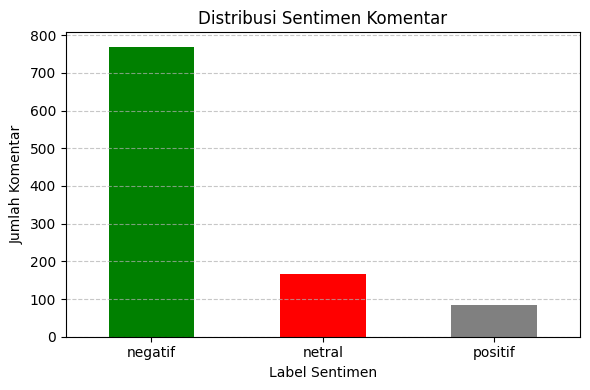

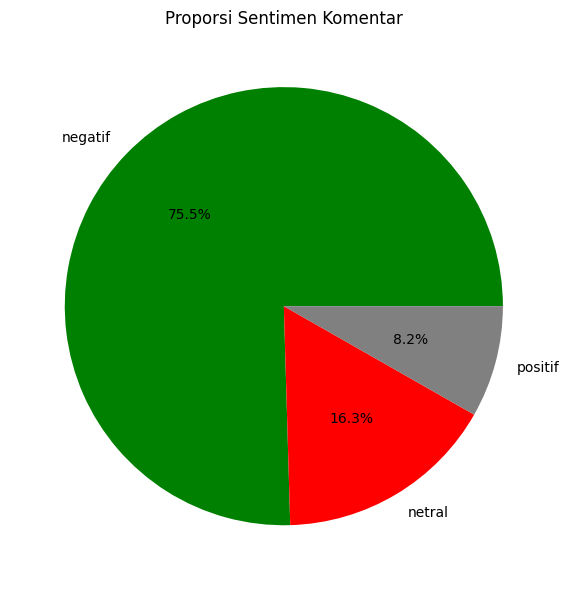

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Hitung jumlah label sentimen
sentimen_counts = df['Sentimen_Model'].value_counts()

# Tampilkan distribusi dalam bentuk tabel
print("Distribusi Sentimen:")
print(sentimen_counts)

# Bar Chart
plt.figure(figsize=(6, 4))
sentimen_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribusi Sentimen Komentar')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Komentar')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
sentimen_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title('Proporsi Sentimen Komentar')
plt.ylabel('')  # Hapus label sumbu Y
plt.tight_layout()
plt.show()


##Visualisasi WordCloud

In [ ]:
!pip install wordcloud

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
review_all = []

for review in df['text_final']:
  text = review.split()
  for token_review in text:
    #print(token_review)
    review_all.append(token_review)

freq_dist = FreqDist(review_all)
print("Kata yang sering muncul")
freq_dist

common_review = freq_dist.most_common(500)
print(common_review)

# memasukkan 500 sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 500 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

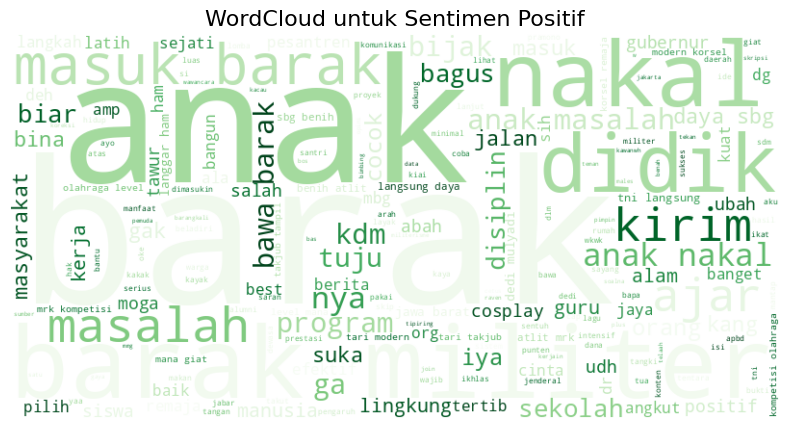

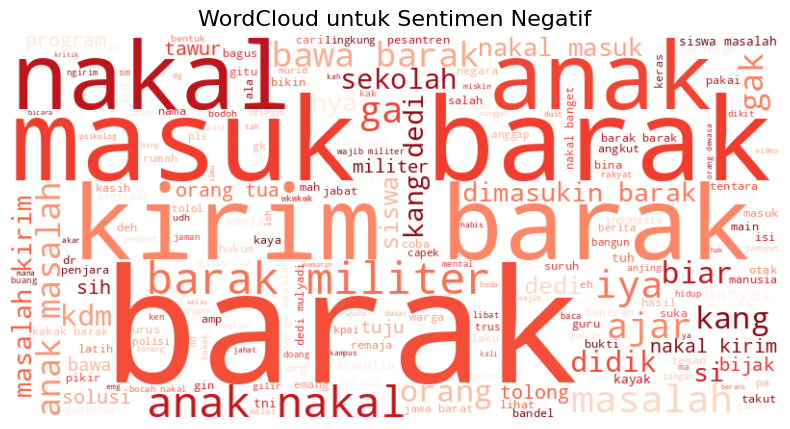

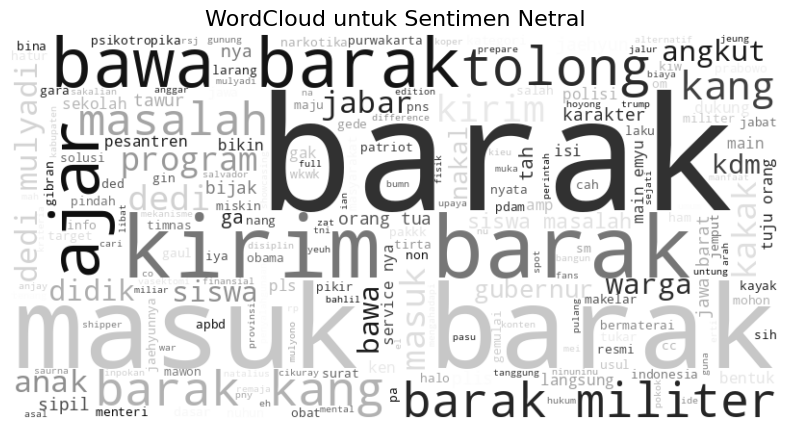

In [ ]:
# Pastikan semua lowercase dan drop NaN
df['text_final'] = df['text_final'].astype(str).str.lower()
df = df.dropna(subset=['text_final', 'Sentimen_Model'])

# Fungsi untuk membuat WordCloud per sentimen
def generate_wordcloud(data, sentimen_label, warna):
    text = " ".join(data[data['Sentimen_Model'] == sentimen_label]['text_final'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=warna).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud untuk Sentimen {sentimen_label.capitalize()}', fontsize=16)
    plt.show()

# Buat WordCloud untuk masing-masing kategori
generate_wordcloud(df, 'positif', 'Greens')
generate_wordcloud(df, 'negatif', 'Reds')
generate_wordcloud(df, 'netral', 'gray')


#Subcategory

##Positif

In [ ]:
import pandas as pd
df = pd.read_csv('hasil_sentimen_model.csv')

###no param

In [ ]:
import pandas as pd
import time

# ===== Konfigurasi =====
batch_size = 5
max_retry = 3

# ===== Label valid untuk klasifikasi topik =====
ALLOWED_TOPICS = [
    "Setuju dengan Kebijakan",
    "Apresiasi terhadap Figur",
    "Harapan untuk Diterapkan",
    "Lainnya (Unclassified)"
]

# ===== Fungsi Prompt Builder =====
def build_prompt(komentar_batch):
    reviews_text = "\n".join([f"{i+1}. {review}" for i, review in enumerate(komentar_batch)])
    prompt = f"""
Anda adalah seorang analis opini publik.

Tugas Anda adalah mengklasifikasikan komentar masyarakat yang berisi **sentimen positif** terhadap kebijakan Gubernur Jawa Barat, Dedi Mulyadi, mengenai *barak militer untuk siswa bermasalah*.

Tentukan **subkategori** dari tiap komentar positif berdasarkan tema berikut:

1. **Setuju dengan Kebijakan** → komentar yang menunjukkan dukungan langsung terhadap ide atau implementasi barak militer.
2. **Apresiasi terhadap Figur** → komentar yang memuji atau mengapresiasi pribadi Dedi Mulyadi sebagai figur pemimpin.
3. **Harapan untuk Diterapkan** → komentar yang menyatakan harapan agar kebijakan ini diterapkan secara nyata atau diperluas.
4. **Lainnya (Unclassified)** → komentar yang bernada positif namun tidak masuk ke tiga kategori di atas.

Contoh:
1. "Bagus, siswa jadi disiplin kalau dibina seperti ini." → Setuju dengan Kebijakan
2. "Pak Dedi memang keren, selalu punya ide bagus!" → Apresiasi terhadap Figur
3. "Semoga segera dijalankan di sekolah-sekolah." → Harapan untuk Diterapkan
4. "Wah luar biasa!" → Lainnya (Unclassified)

Berikut adalah daftar komentar positif:
{reviews_text}

Tuliskan subkategori yang sesuai untuk tiap komentar, satu per baris sesuai nomor (tanpa penjelasan tambahan).

Jawaban yang diharapkan:
1. Setuju dengan Kebijakan
2. Apresiasi terhadap Figur
3. Harapan untuk Diterapkan
4. Lainnya (Unclassified)
"""
    return prompt


# ===== Fungsi Validasi dan Parsing =====
def is_valid_response(response, expected_length):
    lines = response.strip().splitlines()
    if len(lines) != expected_length:
        return False
    for line in lines:
        parts = line.split(".", 1)
        if len(parts) != 2 or parts[1].strip() not in ALLOWED_TOPICS:
            return False
    return True

def parse_response(response, expected_length):
    topic_batch = []
    lines = response.strip().splitlines()
    for line in lines:
        parts = line.split(".", 1)
        label = parts[1].strip() if len(parts) == 2 else None
        topic_batch.append(label)
    while len(topic_batch) < expected_length:
        topic_batch.append(None)
    return topic_batch

# ===== Fungsi Proses Batch =====
def proses_batch(komentar_batch, max_retry=max_retry):
    for attempt in range(max_retry):
        prompt = build_prompt(komentar_batch)
        response = output.invoke(prompt)
        if is_valid_response(response, len(komentar_batch)):
            return parse_response(response, len(komentar_batch))
        time.sleep(1)
    return [None] * len(komentar_batch)

# ===== Step 1: Filter komentar positif =====
df_positif = df[df['Sentimen_Model'] == 'positif'].copy()
hasil_klasifikasi = []

# ===== Step 2: Proses per batch =====
for batch_index in range(0, len(df_positif), batch_size):
    komentar_batch = df_positif['text_normalized'].iloc[batch_index:batch_index+batch_size].tolist()
    label_batch = proses_batch(komentar_batch)
    for komentar, label in zip(komentar_batch, label_batch):
        hasil_klasifikasi.append({
            "Komentar": komentar,
            "Subkategori": label
        })

# ===== Step 3: Gabungkan hasil klasifikasi =====
df_subkategori = pd.DataFrame(hasil_klasifikasi)
df_positif = df_positif.merge(df_subkategori, left_on="text_normalized", right_on="Komentar", how="left")

# ===== Step 4: Reprocess komentar gagal =====
df_unlabeled = df_positif[df_positif['Subkategori'].isnull()].reset_index(drop=True)
if not df_unlabeled.empty:
    print(f"🔁 Menemukan {len(df_unlabeled)} komentar yang belum terlabel. Memproses ulang...")
    hasil_ulang = []
    for batch_index in range(0, len(df_unlabeled), batch_size):
        komentar_batch = df_unlabeled['Komentar'].iloc[batch_index:batch_index+batch_size].tolist()
        label_batch = proses_batch(komentar_batch)
        for komentar, label in zip(komentar_batch, label_batch):
            hasil_ulang.append({
                "Komentar": komentar,
                "Subkategori": label
            })
    df_fix = df_positif[df_positif['Subkategori'].notnull()]
    df_positif = pd.concat([df_fix, pd.DataFrame(hasil_ulang)], ignore_index=True)

# ===== Step 5: Simpan ke file =====
df_positif.to_csv("hasil_subkategori_positif.csv", index=False)
print("✅ File hasil_subkategori_positif.csv berhasil disimpan.")


✅ File hasil_subkategori_positif.csv berhasil disimpan.


###with param

In [ ]:
parameters = {
    "temperature": 0.3,
    "top_k": 3,
    "top_p": 0.8,
    "max_tokens": 60,
    "min_tokens": 3,
    "repetition_penalty": 0,
    "random_seed": 42,
    "stop_sequences": ["\n", "\n\n"]  # Bantu hentikan per daftar jika model terlalu panjang
}

In [ ]:
import pandas as pd
import time

# ===== Konfigurasi =====
batch_size = 5
max_retry = 3

# ===== Label valid untuk klasifikasi topik =====
ALLOWED_TOPICS = [
    "Setuju dengan Kebijakan",
    "Apresiasi terhadap Figur",
    "Harapan untuk Diterapkan",
    "Lainnya (Unclassified)"
]

# ===== Fungsi Prompt Builder =====
def build_prompt(komentar_batch):
    reviews_text = "\n".join([f"{i+1}. {review}" for i, review in enumerate(komentar_batch)])
    prompt = f"""
Anda adalah seorang analis opini publik.

Tugas Anda adalah mengklasifikasikan komentar masyarakat yang berisi **sentimen positif** terhadap kebijakan Gubernur Jawa Barat, Dedi Mulyadi, mengenai *barak militer untuk siswa bermasalah*.

Tentukan **subkategori** dari tiap komentar positif berdasarkan tema berikut:

1. **Setuju dengan Kebijakan**
   → Komentar yang menunjukkan dukungan langsung terhadap kebijakan barak.
   → Contoh kata: *setuju, dukung, bagus, keren, mantap, solusi tepat*

2. **Apresiasi terhadap Figur**
   → Komentar yang memuji pribadi atau kepemimpinan Dedi Mulyadi.
   → Contoh kata: *pak dedi, gubernur hebat, pemimpin bijak, figur inspiratif*

3. **Harapan untuk Diterapkan**
   → Komentar yang menunjukkan keinginan agar kebijakan dijalankan atau diterapkan.
   → Contoh kata: *semoga, harap, mudah-mudahan, ingin diterapkan*

4. **Lainnya (Unclassified)**
   → Komentar positif yang tidak jelas arahnya atau tidak termasuk kategori di atas.

Contoh:
1. "Bagus, siswa jadi disiplin kalau dibina seperti ini." → Setuju dengan Kebijakan
2. "Pak Dedi memang keren, selalu punya ide bagus!" → Apresiasi terhadap Figur
3. "Semoga segera dijalankan di sekolah-sekolah." → Harapan untuk Diterapkan
4. "Wah luar biasa!" → Lainnya (Unclassified)

Berikut adalah daftar komentar positif:
{reviews_text}

Tuliskan subkategori yang sesuai untuk tiap komentar, satu per baris sesuai nomor (tanpa penjelasan tambahan).

Jawaban yang diharapkan:
1. Setuju dengan Kebijakan
2. Apresiasi terhadap Figur
3. Harapan untuk Diterapkan
4. Lainnya (Unclassified)
"""
    return prompt



# ===== Fungsi Validasi dan Parsing =====
def is_valid_response(response, expected_length):
    lines = response.strip().splitlines()
    if len(lines) != expected_length:
        return False
    for line in lines:
        parts = line.split(".", 1)
        if len(parts) != 2 or parts[1].strip() not in ALLOWED_TOPICS:
            return False
    return True

def parse_response(response, expected_length):
    topic_batch = []
    lines = response.strip().splitlines()
    for line in lines:
        parts = line.split(".", 1)
        label = parts[1].strip() if len(parts) == 2 else None
        topic_batch.append(label)
    while len(topic_batch) < expected_length:
        topic_batch.append(None)
    return topic_batch

# ===== Fungsi Proses Batch =====
def proses_batch(komentar_batch, max_retry=max_retry):
    for attempt in range(max_retry):
        prompt = build_prompt(komentar_batch)
        response = output.invoke(prompt, parameters=parameters)
        if is_valid_response(response, len(komentar_batch)):
            return parse_response(response, len(komentar_batch))
        time.sleep(1)
    return [None] * len(komentar_batch)

# ===== Step 1: Filter komentar positif =====
df_positif = df[df['Sentimen_Model'] == 'positif'].copy()
hasil_klasifikasi = []

# ===== Step 2: Proses per batch =====
for batch_index in range(0, len(df_positif), batch_size):
    komentar_batch = df_positif['text_normalized'].iloc[batch_index:batch_index+batch_size].tolist()
    label_batch = proses_batch(komentar_batch)
    for komentar, label in zip(komentar_batch, label_batch):
        hasil_klasifikasi.append({
            "Komentar": komentar,
            "Subkategori": label
        })

# ===== Step 3: Gabungkan hasil klasifikasi =====
df_subkategori = pd.DataFrame(hasil_klasifikasi)
df_positif = df_positif.merge(df_subkategori, left_on="text_normalized", right_on="Komentar", how="left")

# ===== Step 4: Reprocess komentar gagal =====
df_unlabeled = df_positif[df_positif['Subkategori'].isnull()].reset_index(drop=True)
if not df_unlabeled.empty:
    print(f"🔁 Menemukan {len(df_unlabeled)} komentar yang belum terlabel. Memproses ulang...")
    hasil_ulang = []
    for batch_index in range(0, len(df_unlabeled), batch_size):
        komentar_batch = df_unlabeled['Komentar'].iloc[batch_index:batch_index+batch_size].tolist()
        label_batch = proses_batch(komentar_batch)
        for komentar, label in zip(komentar_batch, label_batch):
            hasil_ulang.append({
                "Komentar": komentar,
                "Subkategori": label
            })
    df_fix = df_positif[df_positif['Subkategori'].notnull()]
    df_positif = pd.concat([df_fix, pd.DataFrame(hasil_ulang)], ignore_index=True)

# ===== Step 5: Simpan ke file =====
df_positif.to_csv("hasil_subkategori_positif2.csv", index=False)
print("✅ File hasil_subkategori_positif2.csv berhasil disimpan.")


✅ File hasil_subkategori_positif2.csv berhasil disimpan.


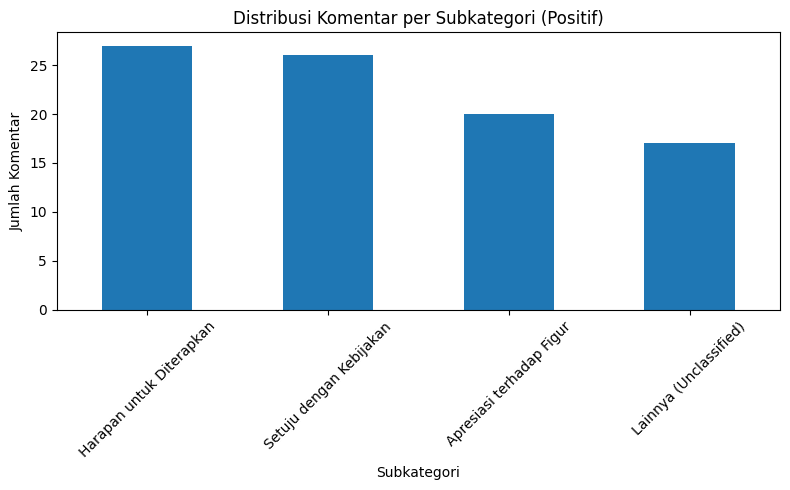

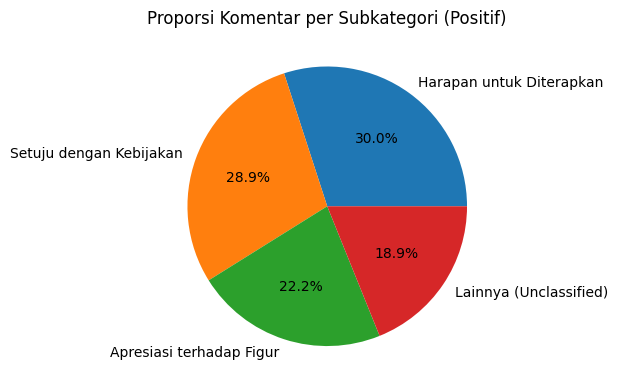

In [ ]:
df_pos = pd.read_csv('hasil_subkategori_positif.csv')
import matplotlib.pyplot as plt

# Hitung jumlah komentar per subkategori
subcat_counts = df_pos['Subkategori'].value_counts()

# Bar Chart
plt.figure(figsize=(8,5))
subcat_counts.plot(kind='bar')
plt.title("Distribusi Komentar per Subkategori (Positif)")
plt.xlabel("Subkategori")
plt.ylabel("Jumlah Komentar")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
subcat_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Proporsi Komentar per Subkategori (Positif)")
plt.ylabel("")
plt.tight_layout()
plt.show()

##Negatif

In [ ]:
import pandas as pd
import time

# ===== Konfigurasi =====
batch_size = 5
max_retry = 3

# ===== Label valid untuk klasifikasi topik =====
ALLOWED_TOPICS = [
    "Tidak Setuju dengan Kebijakan",
    "Ujaran Kebencian",
    "Lainnya (Unclassified)"
]


# ===== Fungsi Prompt Builder =====
def build_prompt(komentar_batch):
    reviews_text = "\n".join([f"{i+1}. {review}" for i, review in enumerate(komentar_batch)])
    prompt = f"""
Anda adalah seorang analis opini publik.

Tugas Anda adalah mengklasifikasikan komentar masyarakat yang mengandung **sentimen negatif** terhadap kebijakan Gubernur Jawa Barat, Dedi Mulyadi, mengenai *barak militer untuk siswa bermasalah*.

Klasifikasikan setiap komentar negatif ke dalam salah satu dari tiga kategori berikut:

1. **Tidak Setuju dengan Kebijakan**
   → Komentar yang menolak, mengkritik, atau menyatakan ketidaksetujuan terhadap konsep atau pelaksanaan kebijakan barak.
   → Contoh kata: *tidak setuju, bukan solusi, gagal, aneh, ngawur, menolak*

2. **Ujaran Kebencian**
   → Komentar yang menyerang atau menghina pribadi, menggunakan kata kasar, menghina pemimpin, atau kelompok tertentu.
   → Contoh kata: *bodoh, bangsat, otak udang, goblok, penjara aja, kriminal, anak nakal*

3. **Lainnya (Unclassified)**
   → Komentar negatif yang tidak termasuk dalam dua kategori di atas, misalnya sarkasme, guyonan sinis, atau komentar yang terlalu singkat untuk dianalisis.

Contoh klasifikasi:
1. "Ini bukan solusi, cuma buang-buang anggaran." → Tidak Setuju dengan Kebijakan
2. "Gubernur otak udang, bikin malu aja." → Ujaran Kebencian
3. "Wah, abis ini disuruh jadi tentara sekalian dong." → Lainnya (Unclassified)

Berikut adalah daftar komentar negatif:
{reviews_text}

Tuliskan **kategori** yang sesuai untuk tiap komentar, satu per baris sesuai nomor (tanpa penjelasan tambahan).

Jawaban yang diharapkan:
1. Tidak Setuju dengan Kebijakan
2. Ujaran Kebencian
3. Lainnya (Unclassified)
"""
    return prompt


# ===== Fungsi Validasi dan Parsing =====
def is_valid_response(response, expected_length):
    lines = response.strip().splitlines()
    if len(lines) != expected_length:
        return False
    for line in lines:
        parts = line.split(".", 1)
        if len(parts) != 2 or parts[1].strip() not in ALLOWED_TOPICS:
            return False
    return True

def parse_response(response, expected_length):
    topic_batch = []
    lines = response.strip().splitlines()
    for line in lines:
        parts = line.split(".", 1)
        label = parts[1].strip() if len(parts) == 2 else None
        topic_batch.append(label)
    while len(topic_batch) < expected_length:
        topic_batch.append(None)
    return topic_batch

# ===== Fungsi Proses Batch =====
def proses_batch(komentar_batch, max_retry=max_retry):
    for attempt in range(max_retry):
        try:
            prompt = build_prompt(komentar_batch)
            response = output.invoke(prompt)  # ganti sesuai pemanggilan replicate
            if is_valid_response(response, len(komentar_batch)):
                return parse_response(response, len(komentar_batch))
            else:
                print(f"⚠️ Respon tidak valid pada attempt {attempt+1}. Retry...")
        except Exception as e:
            print(f"❌ Error saat proses batch (attempt {attempt+1}): {e}")
            time.sleep(1)  # jeda sebelum ulangi retry

    # Kalau semua attempt gagal
    print("🚫 Batch gagal diproses. Melewati komentar ini.")
    return [None] * len(komentar_batch)


# ===== Step 1: Filter komentar negatif =====
df_negatif = df[df['Sentimen_Model'] == 'negatif'].copy()
hasil_klasifikasi = []

# ===== Step 2: Proses per batch =====
for batch_index in range(0, len(df_negatif), batch_size):
    komentar_batch = df_negatif['text_normalized'].iloc[batch_index:batch_index+batch_size].tolist()
    label_batch = proses_batch(komentar_batch)
    for komentar, label in zip(komentar_batch, label_batch):
        hasil_klasifikasi.append({
            "Komentar": komentar,
            "Subkategori": label
        })

# ===== Step 3: Gabungkan hasil klasifikasi =====
df_subkategori = pd.DataFrame(hasil_klasifikasi)
df_negatif = df_negatif.merge(df_subkategori, left_on="text_normalized", right_on="Komentar", how="left")

# ===== Step 4: Reprocess komentar gagal =====
df_unlabeled = df_negatif[df_negatif['Subkategori'].isnull()].reset_index(drop=True)
if not df_unlabeled.empty:
    print(f"🔁 Menemukan {len(df_unlabeled)} komentar yang belum terlabel. Memproses ulang...")
    hasil_ulang = []
    for batch_index in range(0, len(df_unlabeled), batch_size):
        komentar_batch = df_unlabeled['Komentar'].iloc[batch_index:batch_index+batch_size].tolist()
        label_batch = proses_batch(komentar_batch)
        for komentar, label in zip(komentar_batch, label_batch):
            hasil_ulang.append({
                "Komentar": komentar,
                "Subkategori": label
            })
    df_fix = df_negatif[df_negatif['Subkategori'].notnull()]
    df_negatif = pd.concat([df_fix, pd.DataFrame(hasil_ulang)], ignore_index=True)

# ===== Step 5: Simpan ke file =====
df_negatif.to_csv("hasil_subkategori_negatif.csv", index=False)
print("✅ File hasil_subkategori_negatif.csv berhasil disimpan.")


❌ Error saat proses batch (attempt 1): Prediction failed for an unknown reason. It might have run out of memory? (exitcode -9)
❌ Error saat proses batch (attempt 2): Director: unexpected error handling prediction (E8765)
❌ Error saat proses batch (attempt 1): Prediction failed for an unknown reason. It might have run out of memory? (exitcode -9)
❌ Error saat proses batch (attempt 2): Director: unexpected error handling prediction (E8765)
❌ Error saat proses batch (attempt 1): Prediction failed for an unknown reason. It might have run out of memory? (exitcode -9)
❌ Error saat proses batch (attempt 2): Director: unexpected error handling prediction (E8765)
❌ Error saat proses batch (attempt 1): Prediction failed for an unknown reason. It might have run out of memory? (exitcode -9)
❌ Error saat proses batch (attempt 2): Director: unexpected error handling prediction (E8765)
❌ Error saat proses batch (attempt 1): Prediction failed for an unknown reason. It might have run out of memory? (ex

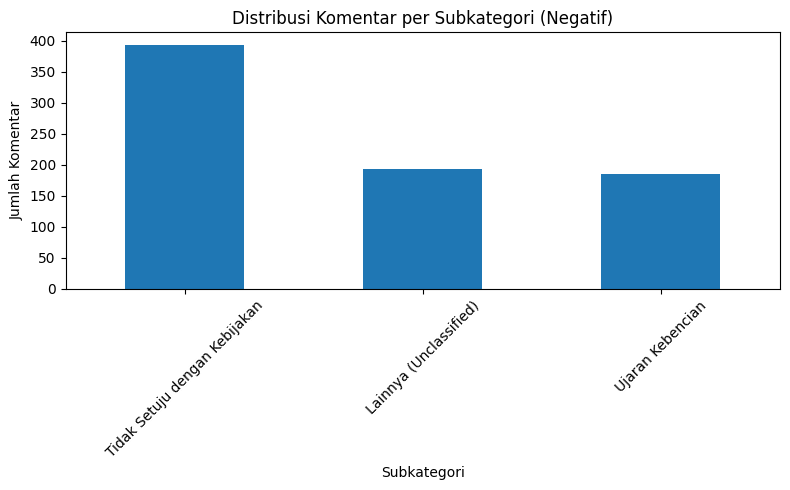

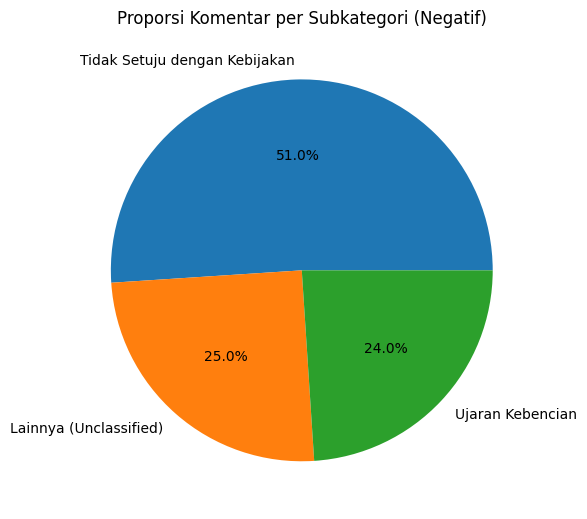

In [ ]:
df_neg = pd.read_csv('hasil_subkategori_negatif.csv')
import matplotlib.pyplot as plt

# Hitung jumlah komentar per subkategori
subcat_counts = df_neg['Subkategori'].value_counts()

# Bar Chart
plt.figure(figsize=(8,5))
subcat_counts.plot(kind='bar')
plt.title("Distribusi Komentar per Subkategori (Negatif)")
plt.xlabel("Subkategori")
plt.ylabel("Jumlah Komentar")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
subcat_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Proporsi Komentar per Subkategori (Negatif)")
plt.ylabel("")
plt.tight_layout()
plt.show()

##Netral

*harus menghapus pesan yang kurang dari 50 kata untuk mengurangi konten yang tidak relevan

In [ ]:
df = pd.read_csv("hasil_sentimen_model.csv")

In [ ]:
parameters = {
    "temperature": 0.3,
    "top_k": 3,
    "top_p": 0.8,
    "max_tokens": 60,
    "min_tokens": 3,
    "repetition_penalty": 0,
    "random_seed": 42,
    "stop_sequences": ["\n", "\n\n"]  # Bantu hentikan per daftar jika model terlalu panjang
}

In [ ]:
import pandas as pd
import time

# ===== Konfigurasi =====
batch_size = 5
max_retry = 3

# ===== Label valid untuk klasifikasi topik =====
ALLOWED_TOPICS = [
    "Pernyataan Fakta atau Informasi",
    "Permintaan atau Usulan",
    "Lainnya (Unclassified)"
]



# ===== Fungsi Prompt Builder =====
def build_prompt(komentar_batch):
    reviews_text = "\n".join([f"{i+1}. {review}" for i, review in enumerate(komentar_batch)])
    prompt = f"""
Anda adalah seorang analis opini publik.

Tugas Anda adalah mengklasifikasikan komentar masyarakat yang **berisi sentimen netral** terhadap kebijakan Gubernur Jawa Barat, Dedi Mulyadi, mengenai *barak militer untuk siswa bermasalah*.

Tentukan subkategori dari tiap komentar netral berdasarkan kriteria berikut:

1. **Pernyataan Fakta atau Informasi**
   → Komentar yang menyampaikan kabar, lokasi, aktor, data, atau deskripsi tanpa opini.
   → Contoh kata: *program, barak militer, siswa, jadwal, lokasi, pesantren, nama tokoh*

2. **Permintaan atau Usulan**
   → Komentar yang berisi ajakan, harapan, pertanyaan, atau saran terhadap kebijakan.
   → Contoh kata: *tolong, mohon, bisa gak, bagaimana kalau, sebaiknya, usul*

3. **Lainnya (Unclassified)**
   → Komentar yang ambigu, terlalu singkat, atau tidak termasuk dua kategori di atas.

Contoh:
1. "Barak militer akan dimulai di Purwakarta." → Pernyataan Fakta atau Informasi
2. "Tolong diterapkan di sekolah saya juga." → Permintaan atau Usulan
3. "Yaudah sih." → Lainnya (Unclassified)

Berikut adalah daftar komentar netral:
{reviews_text}

Tuliskan subkategori yang sesuai untuk tiap komentar, satu per baris sesuai nomor (tanpa penjelasan tambahan).

Jawaban yang diharapkan:
1. Pernyataan Fakta atau Informasi
2. Permintaan atau Usulan
3. Lainnya (Unclassified)
"""
    return prompt



# ===== Fungsi Validasi dan Parsing =====
def is_valid_response(response, expected_length):
    lines = response.strip().splitlines()
    if len(lines) != expected_length:
        return False
    for line in lines:
        parts = line.split(".", 1)
        if len(parts) != 2 or parts[1].strip() not in ALLOWED_TOPICS:
            return False
    return True

def parse_response(response, expected_length):
    topic_batch = []
    lines = response.strip().splitlines()
    for line in lines:
        parts = line.split(".", 1)
        label = parts[1].strip() if len(parts) == 2 else None
        topic_batch.append(label)
    while len(topic_batch) < expected_length:
        topic_batch.append(None)
    return topic_batch

# ===== Fungsi Proses Batch =====
def proses_batch(komentar_batch, max_retry=max_retry):
    for attempt in range(max_retry):
        try:
            prompt = build_prompt(komentar_batch)
            response = output.invoke(prompt, parameters=parameters)  # ganti sesuai pemanggilan replicate
            if is_valid_response(response, len(komentar_batch)):
                return parse_response(response, len(komentar_batch))
            else:
                print(f"⚠️ Respon tidak valid pada attempt {attempt+1}. Retry...")
        except Exception as e:
            print(f"❌ Error saat proses batch (attempt {attempt+1}): {e}")
            time.sleep(1)  # jeda sebelum ulangi retry

    # Kalau semua attempt gagal
    print("🚫 Batch gagal diproses. Melewati komentar ini.")
    return [None] * len(komentar_batch)


# ===== Step 1: Filter komentar netral =====
df_netral = df[
    (df['Sentimen_Model'] == 'netral') &
    (df['text_normalized'].str.len() >= 50)
].copy()
hasil_klasifikasi = []

# ===== Step 2: Proses per batch =====
for batch_index in range(0, len(df_netral), batch_size):
    komentar_batch = df_netral['text_normalized'].iloc[batch_index:batch_index+batch_size].tolist()
    label_batch = proses_batch(komentar_batch)
    for komentar, label in zip(komentar_batch, label_batch):
        hasil_klasifikasi.append({
            "Komentar": komentar,
            "Subkategori": label
        })

# ===== Step 3: Gabungkan hasil klasifikasi =====
df_subkategori = pd.DataFrame(hasil_klasifikasi)
# Merge hasil klasifikasi ke df_netral
df_netral = df_netral.merge(df_subkategori, left_on="text_normalized", right_on="Komentar", how="left")

# 🚧 Pastikan kolom 'Subkategori' benar-benar ada
if 'Subkategori' in df_netral.columns:
    df_unlabeled = df_netral[df_netral['Subkategori'].isnull()].reset_index(drop=True)

    if not df_unlabeled.empty:
        print(f"🔁 Menemukan {len(df_unlabeled)} komentar yang belum terlabel. Memproses ulang...")
        ...
else:
    print("⚠️ Merge gagal menambahkan kolom 'Subkategori'. Pastikan key pencocokan benar.")

# ===== Step 4: Reprocess komentar gagal =====
df_unlabeled = df_netral[df_netral['Subkategori'].isnull()].reset_index(drop=True)
if not df_unlabeled.empty:
    print(f"🔁 Menemukan {len(df_unlabeled)} komentar yang belum terlabel. Memproses ulang...")
    hasil_ulang = []
    for batch_index in range(0, len(df_unlabeled), batch_size):
        komentar_batch = df_unlabeled['Komentar'].iloc[batch_index:batch_index+batch_size].tolist()
        label_batch = proses_batch(komentar_batch)
        for komentar, label in zip(komentar_batch, label_batch):
            hasil_ulang.append({
                "Komentar": komentar,
                "Subkategori": label
            })
    df_fix = df_netral[df_netral['Subkategori'].notnull()]
    df_netral = pd.concat([df_fix, pd.DataFrame(hasil_ulang)], ignore_index=True)

# ===== Step 5: Simpan ke file =====
df_netral.to_csv("hasil_subkategori_netral.csv", index=False)
print("✅ File hasil_subkategori_netral.csv berhasil disimpan.")


⚠️ Respon tidak valid pada attempt 1. Retry...
✅ File hasil_subkategori_netral.csv berhasil disimpan.


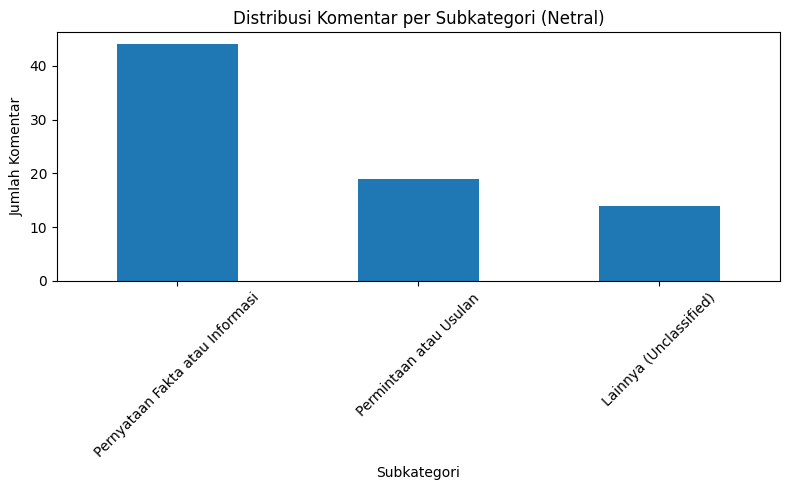

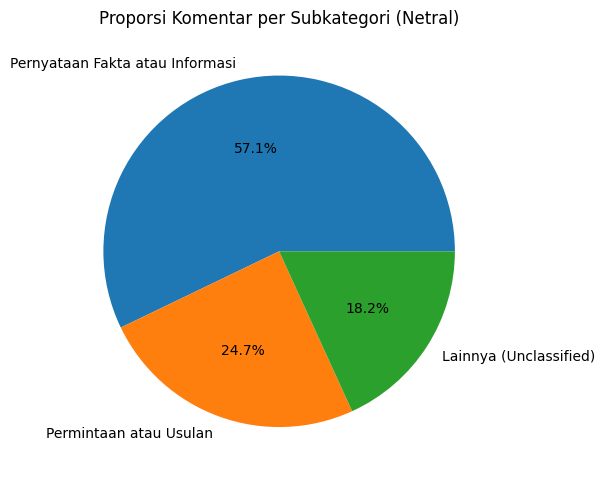

In [ ]:
df_net = pd.read_csv('hasil_subkategori_netral.csv')
import matplotlib.pyplot as plt

# Hitung jumlah komentar per subkategori
subcat_counts = df_net['Subkategori'].value_counts()

# Bar Chart
plt.figure(figsize=(8,5))
subcat_counts.plot(kind='bar')
plt.title("Distribusi Komentar per Subkategori (Netral)")
plt.xlabel("Subkategori")
plt.ylabel("Jumlah Komentar")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
subcat_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Proporsi Komentar per Subkategori (Netral)")
plt.ylabel("")
plt.tight_layout()
plt.show()

#Data Summarization

##Positif

In [ ]:
df_positif = pd.read_csv("hasil_subkategori_positif.csv")

###Setuju Dengan Kebijakan

In [ ]:
parameters = {
    "temperature": 0.3,             # Tetap netral dan tidak liar
    "top_k": 5,                     # Ambil pilihan kata dengan probabilitas tinggi
    "top_p": 0.9,                   # Batasi kemungkinan sampling token langka
    "max_tokens": 300,             # Batas maksimal panjang ringkasan
    "min_tokens": 40,              # Hindari ringkasan yang terlalu pendek
    "repetition_penalty": 1.0,     # Cegah pengulangan frasa
    "stop_sequences": ["\n\n", "\n"]  # Akhiri ketika sudah selesai paragraf
}

In [ ]:
# ===== Step 6: Ringkasan dari subkategori "Pernyataan Fakta atau Informasi" =====

# Filter komentar netral fakta yang menyebut "barak" atau kata relevan
df_setuju = df_positif[
    (df_positif['Subkategori'] == "Setuju dengan Kebijakan") &
    (df_positif['Komentar'])
].copy()

# Gabungkan komentarnya jadi satu teks panjang
text_to_summarize = "\n".join(df_setuju['Komentar'].tolist())

# Buat prompt ringkasan (khusus Granite)
prompt_summarize = f"""
Berikut adalah kumpulan komentar positif masyarakat yang berisi pernyataan setuju dengan kebijakan Gubernur Jawa Barat tentang barak militer untuk siswa bermasalah:

{text_to_summarize}

Tugas Anda adalah menyimpulkan isi utama komentar-komentar ini dengan bahasa indonesia.
Fokus hanya pada informasi yang berhubungan dengan kebijakan barak militer — abaikan informasi lain.
"""

# Invoke Granite (atau model LLM lain yang digunakan)
summary_response_setuju = output.invoke(prompt_summarize, parameters=parameters)

# Tampilkan hasil
print("🧾 Ringkasan Komentar Positif (Topik Barak Militer):\n")
print(summary_response_setuju.strip())


🧾 Ringkasan Komentar Fakta (Topik Barak Militer):

Isi utama komentar masyarakat mengenai kebijakan Gubernur Jawa Barat yang memasukkan siswa bermasalah ke barak militer adalah setuju dan dukungan terhadap inisiatif tersebut. Mereka melihat program ini sebagai cara efektif untuk membantu siswa yang mengalami masalah disiplin dan kesulitan akademik. Beberapa tuntutan dan pernyataan utama yang dapat diambil adalah:

1. Program pelatihan di barak militer memberikan tempat alternatif bagi siswa yang sulit menyelesaikan pekerjaan sekolah, seperti skripsi.
2. Dari wawancara dengan siswa, diketahui bahwa mereka diberikan teman bimbingan dan pembinaan disiplin di barak, yang dapat membantu mengatasi kekacauan lingkungan mereka.
3. Tidak ada pengaruh yang melanggar kitab HAM (Kode Etika Militer Indonesia) dengan memasukkan siswa ke barak, sebagai salah satu metode mendidik anak bermasalah.
4. Setiap manusia memiliki hak untuk mendapat perlindungan dan hidup dengan normalitas, dan barak militer 

###Harapan Untuk Diterapkan

In [ ]:
parameters = {
    "temperature": 0.3,             # Tetap netral dan tidak liar
    "top_k": 5,                     # Ambil pilihan kata dengan probabilitas tinggi
    "top_p": 0.9,                   # Batasi kemungkinan sampling token langka
    "max_tokens": 300,             # Batas maksimal panjang ringkasan
    "min_tokens": 40,              # Hindari ringkasan yang terlalu pendek
    "repetition_penalty": 1.0,     # Cegah pengulangan frasa
    "stop_sequences": ["\n\n", "\n"]  # Akhiri ketika sudah selesai paragraf
}

In [ ]:
# ===== Step 6: Ringkasan dari subkategori "Pernyataan Fakta atau Informasi" =====

# Filter komentar netral fakta yang menyebut "barak" atau kata relevan
df_harapan = df_positif[
    (df_positif['Subkategori'] == "Harapan Untuk Diterapkan") &
    (df_positif['Komentar'])
].copy()

# Gabungkan komentarnya jadi satu teks panjang
text_to_summarize = "\n".join(df_harapan['Komentar'].tolist())

# Buat prompt ringkasan (khusus Granite)
prompt_summarize = f"""
Berikut adalah kumpulan komentar positif masyarakat yang berisi harapan dari diterapkannya kebijakan Gubernur Jawa Barat tentang barak militer untuk siswa bermasalah:

{text_to_summarize}

Tugas Anda adalah menyimpulkan isi utama komentar-komentar ini dengan bahasa indonesia.
Fokus hanya pada informasi yang berhubungan dengan kebijakan barak militer — abaikan informasi lain.
"""

# Invoke Granite (atau model LLM lain yang digunakan)
summary_response_harapan = output.invoke(prompt_summarize, parameters=parameters)

# Tampilkan hasil
print("🧾 Ringkasan Komentar Positif (Topik Barak Militer):\n")
print(summary_response_harapan.strip())


🧾 Ringkasan Komentar Positif (Topik Barak Militer):

Berikut adalah ringkasan dari isi komentar-komentar tersebut berdasarkan kebijakan barak militer untuk siswa bermasalah yang dilaksanakan oleh Gubernur Jawa Barat:

1. **Harapan terhadap Kemudahan Akses**: Para pelaku komentar berharap bahwa dengan pengembangan ini, siswa-siswa yang mengalami kesulitan ekonomi dapat dengan lebih mudah mengikuti latihan dan pelatihan militer, tanpa dibatasi oleh biaya.

2. **Pembinaan Kemampuan Teknis**: Komentar-komentar menunjukkan harapan bahwa barak militer akan membantu siswa untuk mengembangkan kemampuan teknis yang diperlukan dalam bidang keamanan dan pertahanan negara, sehingga mereka dapat berkontribusi secara nyata kepada negara.

3. **Peningkatan Disiplin dan Tata Tinggi**: Dalam konteks disiplin, komentar menyatakan harapan bahwa barak militer akan membantu siswa dalam mengembangkan nilai-nilai disiplin, kerapuhan fizik dan mental, dan mendorong mereka untuk menjadi individu yang bersikap 

##Negatif

In [ ]:
df_negatif = pd.read_csv("hasil_subkategori_negatif.csv")

###Tidak Setuju dengan Kebijakan

In [ ]:
import time

def summarize_batch(text_batch, max_retry=3):
    prompt_batch = f"""
Berikut adalah komentar masyarakat yang berisi sentimen negatif terhadap kebijakan barak militer untuk siswa bermasalah:

{text_batch}

Tugas Anda adalah menyimpulkan poin utama kritik atau penolakan masyarakat dalam komentar-komentar ini.
Gunakan bahasa Indonesia yang singkat dan padat.
"""
    for attempt in range(max_retry):
        try:
            response = output.invoke(prompt_batch, parameters=parameters)
            if response and len(response.strip()) > 10:
                return response.strip()
            else:
                print(f"⚠️ [Retry {attempt+1}] Response kosong atau tidak valid.")
        except Exception as e:
            print(f"❌ [Retry {attempt+1}] Error saat ringkasan batch: {e}")
            time.sleep(1)

    print("🚫 Batch gagal diproses setelah 3 kali percobaan.")
    return None  # Batch gagal

# ===== Proses seluruh batch negatif =====
batch_size = 30
summaries = []

for i in range(0, len(df_negatif), batch_size):
    komentar_batch = df_negatif['Komentar'].iloc[i:i+batch_size].dropna().tolist()
    text_batch = "\n".join(komentar_batch)

    summary = summarize_batch(text_batch)
    if summary:
        summaries.append(summary)
    else:
        summaries.append("[BATCH GAGAL]")  # placeholder bisa kamu revisi

# ===== Final summarization dari semua batch sukses =====
valid_summaries = [s for s in summaries if s != "[BATCH GAGAL]"]

final_input = "\n".join(valid_summaries)
final_prompt = f"""
Berikut adalah ringkasan-ringkasan dari beberapa kelompok komentar negatif terhadap kebijakan barak militer:

{final_input}

Tugas Anda adalah membuat ringkasan akhir dari keseluruhan sentimen negatif ini dalam 4-6 kalimat.
Sebutkan poin penolakan utama yang sering muncul.
"""

final_summary = output.invoke(final_prompt, parameters=parameters)
print("🧾 Ringkasan Final Sentimen Negatif:")
print(final_summary.strip())


🧾 Ringkasan Final Sentimen Negatif:
The primary points of criticism from society regarding the military barracks policy for troubled students revolve around the perceived ineffectiveness and inappropriateness of using military institutions as a solution for educational and behavioral issues. Critics argue that this approach neglects the root causes of students' problems, such as family issues or psychological distress, and instead resorts to a punitive measure without proper investigation or alternative solutions. There's also concern over the potential for abuse, discrimination, and violation of children's rights, as well as the lack of transparency and parental involvement in decision-making processes. Furthermore, the critics question the efficacy of military training in addressing behavioral issues and foster discipline, suggesting that more humane and comprehensive educational or psychological interventions would be more beneficial.


In [ ]:
final_prompt = f"""
Berikut adalah ringkasan-ringkasan dari beberapa kelompok komentar negatif terhadap kebijakan barak militer:

{final_input}

Tugas Anda adalah membuat ringkasan akhir dari keseluruhan sentimen negatif ini dalam bahasa Indonesia.
Sebutkan poin penolakan utama yang sering muncul.
"""

final_summary = output.invoke(final_prompt, parameters=parameters)
print("🧾 Ringkasan Final Sentimen Negatif:")
print(final_summary.strip())

🧾 Ringkasan Final Sentimen Negatif:
Ringkasan dari sentimen negatif masyarakat terhadap kebijakan barak militer bagi siswa bermasalah menunjukkan beberapa poin penolakan utama yang sering muncul:

1. **Ineffektivitas dan Insepsinya**: Kritik utama adalah kegagalan barak militer dalam menyelesaikan masalah sebenarnya siswa, seperti masalah keluarga, pendidikan, atau sosial, tanpa memeriksa akar masalah.

2. **Mengabaikan Root Cause**: Tindakan mengirimkan siswa bermasalah ke barak militer tanpa mempertimbangkan faktor-faktor yang sebenarnya menyebabkan masalah mereka, seperti masalah keluarga atau masyarakat.

3. **Disiplin Terhadap Perbaikan**: Kritik terhadap pendekatan yang menganggap barak militer sebagai solusi cepat untuk mendisiplinkan anak tanpa memeriksa dan mengatasi penyebab utama masalah.

4. **Keterbatasan Hukum**: Ada kritikan terhadap gubernur atau pemerintah yang memandu siswa bermasalah ke barak militer tanpa memiliki wewenang hukum untuk mengambil tindakan seperti ini.

##Netral

In [ ]:
df_subkategori = df_netral.copy()

###Pernyataan Fakta atau Informasi

In [ ]:
parameters = {
    "temperature": 0.3,             # Tetap netral dan tidak liar
    "top_k": 5,                     # Ambil pilihan kata dengan probabilitas tinggi
    "top_p": 0.9,                   # Batasi kemungkinan sampling token langka
    "max_tokens": 250,             # Batas maksimal panjang ringkasan
    "min_tokens": 40,              # Hindari ringkasan yang terlalu pendek
    "repetition_penalty": 1.0,     # Cegah pengulangan frasa
    "stop_sequences": ["\n\n", "\n"]  # Akhiri ketika sudah selesai paragraf
}

In [ ]:
# ===== Step 6: Ringkasan dari subkategori "Pernyataan Fakta atau Informasi" =====

# Filter komentar netral fakta yang menyebut "barak" atau kata relevan
df_fakta = df_netral[
    (df_netral['Subkategori'] == "Pernyataan Fakta atau Informasi") &
    (df_netral['Komentar'])
].copy()

# Gabungkan komentarnya jadi satu teks panjang
text_to_summarize = "\n".join(df_fakta['Komentar'].tolist())

# Buat prompt ringkasan (khusus Granite)
prompt_summarize = f"""
Berikut adalah kumpulan komentar netral masyarakat yang berisi pernyataan fakta atau informasi terkait kebijakan Gubernur Jawa Barat tentang barak militer untuk siswa bermasalah:

{text_to_summarize}

Tugas Anda adalah menyimpulkan isi utama komentar-komentar ini dengan bahasa indonesia.
Fokus hanya pada informasi yang berhubungan dengan kebijakan barak militer — abaikan informasi lain.
"""

# Invoke Granite (atau model LLM lain yang digunakan)
summary_response = output.invoke(prompt_summarize, parameters=parameters)

# Tampilkan hasil
print("🧾 Ringkasan Komentar Fakta (Topik Barak Militer):\n")
print(summary_response.strip())


🧾 Ringkasan Komentar Fakta (Topik Barak Militer):

Sedangkan ada pelbagai reaksi, isu utama dalam komentar-komentar tersebut adalah kebijakan Gubernur Jawa Barat yang mengirimkan siswa bermasalah ke barak militer. Deddy Mulyadi, sebagai peminitian, mengusulkan ini sebagai upaya untuk membangun disiplin dan karakter, terutama untuk mengatasi masalah seperti tawuran dan penyalahgunaan zat. Kebijakan ini dimulai bulan Mei dan melibatkan siswa dengan persetujuan orang tua dan menteri Ham Natalius. 

Anggaran program tersebut berasal dari APBD Provinsi Jawa Barat dan didukung oleh pemerintah kabupaten, dengan barak TNI sebagai dukungan non-finansial. Kebijakan ini, menurut Menteri Ham, bukan sebagai bentuk hukuman fisik, tetapi upaya untuk membentuk karakter mental dan tanggung jawab. 

Siswa yang bermasalah dijemput dan dikirim ke barak militer dengan persetujuan dari orang tua dan berdasarkan surat pernyataan resmi bermaterai. Program ini juga mencakup warga bermasalah lain, termasuk PNS,

In [ ]:
# ===== Step 6: Ringkasan dari subkategori "Pernyataan Fakta atau Informasi" =====

# Filter komentar netral fakta yang menyebut "barak" atau kata relevan
df_fakta = df_netral[
    (df_netral['Subkategori'] == "Pernyataan Fakta atau Informasi") &
    (df_netral['Komentar'])
].copy()

# Gabungkan komentarnya jadi satu teks panjang
text_to_summarize = "\n".join(df_fakta['Komentar'].tolist())

# Buat prompt ringkasan (khusus Granite)
prompt_summarize = f"""
Berikut adalah kumpulan komentar netral masyarakat yang berisi pernyataan fakta atau informasi terkait kebijakan Gubernur Jawa Barat tentang barak militer untuk siswa bermasalah:

{text_to_summarize}

Tugas Anda adalah menyimpulkan isi utama komentar-komentar ini dengan bahasa indonesia.
Fokus hanya pada informasi yang berhubungan dengan kebijakan barak militer — abaikan informasi lain.
"""

# Invoke Granite (atau model LLM lain yang digunakan)
summary_response = output.invoke(prompt_summarize, parameters=parameters)

# Tampilkan hasil
print("🧾 Ringkasan Komentar Fakta (Topik Barak Militer):\n")
print(summary_response.strip())

🧾 Ringkasan Komentar Fakta (Topik Barak Militer):

Isi utama komentar-komentar tersebut menyampaikan informasi mengenai kebijakan Gubernur Jawa Barat, Dedi Mulyadi, yang mengirimkan siswa bermasalah ke barak militer untuk membangun disiplin dan karakter, terutama dalam mengatasi masalah seperti tawuran dan penyalahgunaan zat. Program ini, yang dimulai bulan Mei, melibatkan siswa dengan persetujuan dari orang tua dan menteri Ham Natalius. 

Kebijakan ini dijelaskan sebagai upaya pembentukan karakter mental dan tanggung jawab, bukan hukuman fisik. Anggaran program tersebut berasal dari APBD provinsi Jabar, sekitar miliar rupiah, dan didukung oleh pemerintah kabupaten. Barak TNI digunakan sebagai dukungan non-finansial.

Siswa yang bermasalah dijemput dan dikirim ke barak militer dengan persetujuan orang tua dan berdasarkan surat pernyataan resmi bermaterai. Kemudian, Dedi Mulyadi mengusulkan program ini diteruskan untuk warga bermasalah juga. 

Walaupun ada komentar yang mengkritik atau 

###Permintaan atau Usulan

In [ ]:
# ===== Step 6: Ringkasan dari subkategori "Pernyataan Fakta atau Informasi" =====

# Filter komentar netral fakta yang menyebut "barak" atau kata relevan
df_usulan = df_netral[
    (df_netral['Subkategori'] == "Permintaan atau Usulan") &
    (df_netral['Komentar'])
].copy()

# Gabungkan komentarnya jadi satu teks panjang
text_to_summarize = "\n".join(df_usulan['Komentar'].tolist())

# Buat prompt ringkasan (khusus Granite)
prompt_summarize = f"""
Berikut adalah kumpulan komentar netral masyarakat yang berisi pernyataan fakta atau informasi terkait kebijakan Gubernur Jawa Barat tentang barak militer untuk siswa bermasalah:

{text_to_summarize}

Tugas Anda adalah menyimpulkan isi utama komentar-komentar ini dengan bahasa Indonesia terkait permintaan atau usulan yang disampaikan.
Fokus hanya pada informasi yang berhubungan dengan kebijakan barak militer — abaikan informasi lain.
"""

# Invoke Granite (atau model LLM lain yang digunakan)
summary_response2 = output.invoke(prompt_summarize, parameters=parameters)

# Tampilkan hasil
print("🧾 Ringkasan Komentar Fakta (Topik Barak Militer):\n")
print(summary_response2.strip())

🧾 Ringkasan Komentar Fakta (Topik Barak Militer):

Isi utama komentar-komentar tersebut menunjukkan permintaan dan usulan masyarakat berhubungan dengan kebijakan barak militer untuk siswa bermasalah. Berikut adalah ringkasan utama:

1. Alternatif pendidikan: Pendapat dari seseorang mengusulkan gunung Cikuray sebagai alternatif buat mendidik siswa bermasalah, bukan barak militer.

2. Penggunaan pesantren: Pertanyaan mengenai penggunaan pesantren untuk warga yang bermasalah, seperti yang dilakukan dengan barak Gibran, tetapi dengan pesantren.

3. Perbandingan antara barak militer dan sipil: Usulan untuk mencari solusi sipil seperti RSJ atau KDM bagi warga bermasalah, seperti yang dilakukan dengan militer di barak.

4. Pengembangan sosial di barak: Kritik terhadap praktik yang dianggap tidak sehat di barak militer, seperti bullying dan pergaulan bebas, dan permintaan untuk pengembangan sosial lebih baik.

5. Pengiriman siswa bermasalah: Permintaan informasi tentang prosedur pengiriman sis

#visualisasi jumlah karakter (dummy)

In [ ]:
import pandas as pd
df = pd.read_csv("hasil_subkategori_netral.csv")
df['text_length'] = df['full_text'].str.len()
df['text_length'].describe()

,text_length
count,169.000000
mean,80.704142
std,45.673740
min,29.000000
25%,55.000000
50%,68.000000
75%,87.000000
max,288.000000


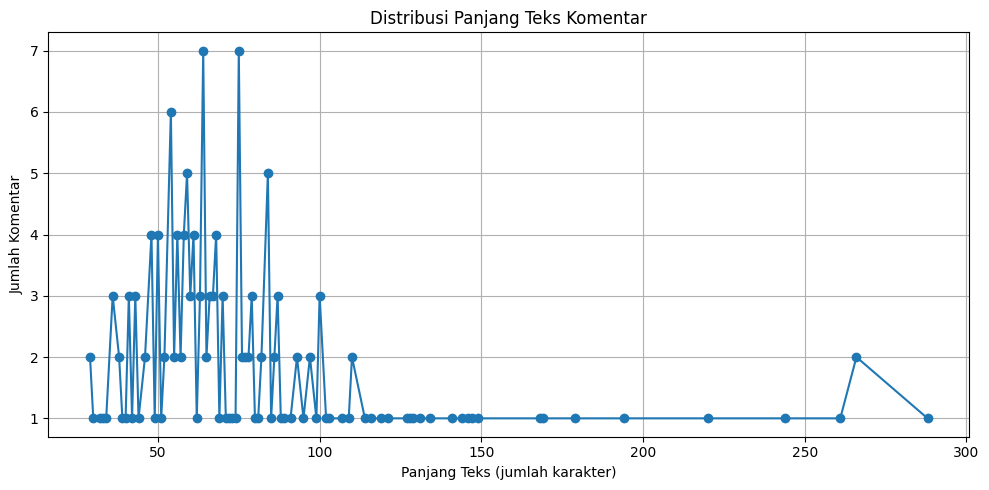

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Hitung panjang teks
df['text_length'] = df['full_text'].str.len()

# Buat distribusi frekuensi
length_counts = df['text_length'].value_counts().sort_index()

# Plot grafik garis
plt.figure(figsize=(10, 5))
plt.plot(length_counts.index, length_counts.values, marker='o')
plt.xlabel('Panjang Teks (jumlah karakter)')
plt.ylabel('Jumlah Komentar')
plt.title('Distribusi Panjang Teks Komentar')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   conversation_id_str  169 non-null    float64
 1   created_at           169 non-null    object 
 2   favorite_count       169 non-null    float64
 3   full_text            169 non-null    object 
 4   text_cleaned         169 non-null    object 
 5   text_normalized      169 non-null    object 
 6   text_tokenized       169 non-null    object 
 7   text_nostopword      169 non-null    object 
 8   text_stemmed         169 non-null    object 
 9   text_final           169 non-null    object 
 10  Sentimen_Model       169 non-null    object 
 11  Komentar             170 non-null    object 
 12  Subkategori          169 non-null    object 
 13  text_length          169 non-null    float64
dtypes: float64(3), object(11)
memory usage: 18.7+ KB


In [ ]:
# Filter komentar dengan panjang lebih dari 350 karakter
komen_pendek = df[(df['full_text'].str.len() <= 250) & (df['full_text'].str.len() > 70)]

# Tampilkan beberapa komentar terpanjang
print(komen_pendek[['full_text']])  # Ganti angka jika ingin lebih banyak


                                                                                                                                                                     full_text
0                                                                                                 Salah satu yang terkemuka adalah mengirim siswa bermasalah ke barak militer.
1                                                      @noucampshop10 Gunung Cikuray bisa jadi alternatif buat mendidik pelajar bermasalah!!! Kalau kagak mau ke barak... hehe
2                                       Spot the difference KDM &amp; Trump edition: - siswa/orang bermasalah mau dikirim ke barak. - orang bermasalah dikirim ke El Salvador.
3                                                                                         @centragl Nanti yg war shipper jg masuk kategori fans bermasalah siap masuk ke barak
4    @BudiBukanIntel KDM minta Warga Jabar yang bermasalah ke Barak Gibran minta Pengguna Narkoba ke Pesantren Gimana kalau m

In [ ]:
pd.set_option('display.max_colwidth', None)
print(komen_pendek[['full_text']])

                                                                                                                                                                     full_text
0                                                                                                 Salah satu yang terkemuka adalah mengirim siswa bermasalah ke barak militer.
1                                                      @noucampshop10 Gunung Cikuray bisa jadi alternatif buat mendidik pelajar bermasalah!!! Kalau kagak mau ke barak... hehe
2                                       Spot the difference KDM &amp; Trump edition: - siswa/orang bermasalah mau dikirim ke barak. - orang bermasalah dikirim ke El Salvador.
3                                                                                         @centragl Nanti yg war shipper jg masuk kategori fans bermasalah siap masuk ke barak
4    @BudiBukanIntel KDM minta Warga Jabar yang bermasalah ke Barak Gibran minta Pengguna Narkoba ke Pesantren Gimana kalau m

#Wordcloud (dummy)


In [ ]:
review_all = []

for review in df['text_final']:
  text = review.split()
  for token_review in text:
    #print(token_review)
    review_all.append(token_review)

freq_dist = FreqDist(review_all)
print("Kata yang sering muncul")
freq_dist

Kata yang sering muncul


FreqDist({'barak': 1125, 'anak': 417, 'nakal': 396, 'masalah': 313, 'masuk': 300, 'kirim': 282, 'militer': 215, 'bawa': 155, 'kang': 148, 'ajar': 123, ...})

In [ ]:
common_review = freq_dist.most_common(500)
print(common_review)

[('barak', 1125), ('anak', 417), ('nakal', 396), ('masalah', 313), ('masuk', 300), ('kirim', 282), ('militer', 215), ('bawa', 155), ('kang', 148), ('ajar', 123), ('dedi', 120), ('orang', 117), ('iya', 107), ('ga', 104), ('gak', 84), ('siswa', 83), ('didik', 79), ('kdm', 72), ('sekolah', 68), ('biar', 67), ('nya', 62), ('tolong', 54), ('program', 51), ('dimasukin', 50), ('banget', 49), ('warga', 45), ('tawur', 44), ('si', 43), ('bijak', 43), ('tuju', 41), ('tua', 39), ('kakak', 38), ('sih', 37), ('gubernur', 36), ('disiplin', 35), ('kerja', 35), ('mulyadi', 34), ('solusi', 34), ('bina', 31), ('jabar', 31), ('tni', 31), ('guru', 30), ('kayak', 30), ('tuh', 28), ('main', 28), ('salah', 26), ('tentara', 26), ('remaja', 24), ('suka', 24), ('bikin', 24), ('jawa', 23), ('negara', 23), ('pesantren', 23), ('langsung', 23), ('latih', 22), ('suruh', 22), ('amp', 22), ('org', 22), ('barat', 21), ('deh', 21), ('angkut', 21), ('gitu', 21), ('laku', 20), ('hukum', 20), ('kaya', 20), ('cari', 20), ('m

In [ ]:
# memasukkan 500 sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,barak,1125
1,anak,417
2,nakal,396
3,masalah,313
4,masuk,300
...,...,...
494,wni,3
496,taruh,3
497,politik,3
498,sisi,3


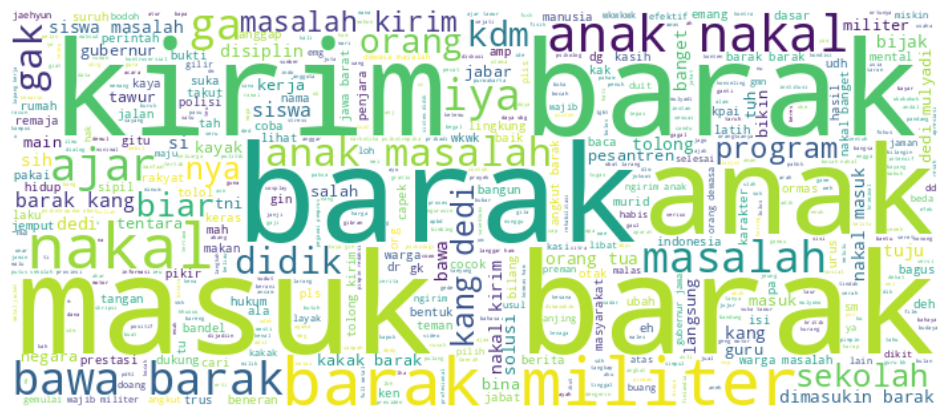

In [ ]:
# membuat visualisasi WordCloud
join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

/tmp/ipython-input-21-2654816536.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')


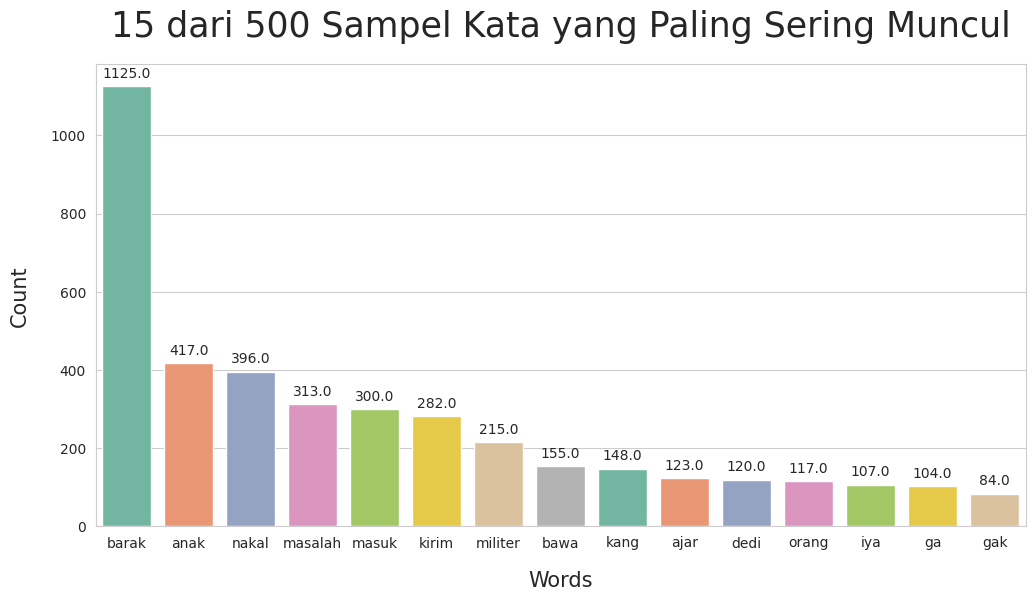

In [ ]:
import seaborn as sns
# membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 500 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()